In [123]:
#EDA 1주차

In [124]:
import pandas as pd

In [125]:
# 작업할 여러개의 파일 중 하나의 파일을 불러옵니다.

file = r'.\rawfiles\CARD_SUBWAY_MONTH_201901.csv'

pd.read_csv(file)


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20190101,2호선,을지로4가,3862.0,3728.0,20190104
1,20190101,3호선,을지로3가,8104.0,7554.0,20190104
2,20190101,2호선,을지로입구,22478.0,21330.0,20190104
3,20190101,2호선,시청,8381.0,6049.0,20190104
4,20190101,6호선,동묘앞,8045.0,8504.0,20190104
...,...,...,...,...,...,...
18329,20190131,우이신설경전철,북한산보국문,6195.0,5786.0,20190203
18330,20190131,우이신설경전철,정릉,4600.0,4211.0,20190203
18331,20190131,4호선,성신여대입구,3922.0,4289.0,20190203
18332,20190131,6호선,보문,1659.0,1693.0,20190203


In [126]:
raw = pd.read_csv(file)
raw.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20190101,2호선,을지로4가,3862.0,3728.0,20190104
1,20190101,3호선,을지로3가,8104.0,7554.0,20190104
2,20190101,2호선,을지로입구,22478.0,21330.0,20190104
3,20190101,2호선,시청,8381.0,6049.0,20190104
4,20190101,6호선,동묘앞,8045.0,8504.0,20190104


In [127]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18334 entries, 0 to 18333
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사용일자    18334 non-null  int64  
 1   노선명     18334 non-null  object 
 2   역명      18334 non-null  object 
 3   승차총승객수  18334 non-null  float64
 4   하차총승객수  18334 non-null  float64
 5   등록일자    18334 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 859.5+ KB


In [128]:
# 이번에 여러 파일을 불러오겠습니다.
# 2개 파일 불러와서 합치기

raw = pd.DataFrame()
raw.head()

file1 = r'.\rawfiles\CARD_SUBWAY_MONTH_201901.csv'
file2 = r'.\rawfiles\CARD_SUBWAY_MONTH_201902.csv'

temp1 = pd.read_csv(file1)
temp2 = pd.read_csv(file2)

# pandas concat 합치때, 인덱스 번호 그래로 간다. 옵션 ignore_index=True 사용하면 인덱스 새로 생성
raw = pd.concat([temp1, temp2], axis=0)

In [129]:
raw

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20190101,2호선,을지로4가,3862.0,3728.0,20190104
1,20190101,3호선,을지로3가,8104.0,7554.0,20190104
2,20190101,2호선,을지로입구,22478.0,21330.0,20190104
3,20190101,2호선,시청,8381.0,6049.0,20190104
4,20190101,6호선,동묘앞,8045.0,8504.0,20190104
...,...,...,...,...,...,...
16538,20190228,2호선,을지로4가,6128.0,7087.0,20190303
16539,20190228,2호선,동대문역사문화공원,3387.0,4061.0,20190303
16540,20190228,5호선,청구,4920.0,4474.0,20190303
16541,20190228,1호선,가산디지털단지,51729.0,52043.0,20190303


In [130]:
import os

In [131]:
os.listdir()

['.ipynb_checkpoints',
 'AI-X_first_homework.ipynb',
 'AIX_아이디어.ipynb',
 'BUS_STATION_BOARDING_MONTH_201901_to_201906',
 'map',
 'rawfiles',
 'subway_raw.csv']

In [132]:
dirpath = 'rawfiles'
os.listdir(dirpath)

['.ipynb_checkpoints',
 'CARD_SUBWAY_MONTH_201901.csv',
 'CARD_SUBWAY_MONTH_201902.csv',
 'CARD_SUBWAY_MONTH_201903.csv',
 'CARD_SUBWAY_MONTH_201904.csv',
 'CARD_SUBWAY_MONTH_201905.csv',
 'CARD_SUBWAY_MONTH_201906.csv']

In [133]:
dirpath = './rawfiles/'
files = os.listdir(dirpath)
files

['.ipynb_checkpoints',
 'CARD_SUBWAY_MONTH_201901.csv',
 'CARD_SUBWAY_MONTH_201902.csv',
 'CARD_SUBWAY_MONTH_201903.csv',
 'CARD_SUBWAY_MONTH_201904.csv',
 'CARD_SUBWAY_MONTH_201905.csv',
 'CARD_SUBWAY_MONTH_201906.csv']

In [134]:
# 여러개의 파일을 병합하겠습니다.

import os
import pandas as pd

dirpath = './rawfiles/'
files = os.listdir(dirpath)

raw = pd.DataFrame()

for file in files:
    filepath = os.path.join(dirpath, file)
    
    # 폴더는 건너뛰기 (.ipynb_checkpoints 포함)
    if os.path.isdir(filepath):
        continue
    
    # CSV 파일만 처리
    if file.endswith('.csv'):
        try:
            temp = pd.read_csv(filepath)
            raw = pd.concat([raw, temp], axis=0)
        except Exception as e:
            print(f"읽기 실패: {filepath} / 오류: {e}")

raw = raw.reset_index(drop=True)  
raw.tail()


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
107023,20190630,7호선,마들,6622.0,6116.0,20190703
107024,20190630,4호선,노원,14071.0,14702.0,20190703
107025,20190630,7호선,중계,9516.0,8981.0,20190703
107026,20190630,7호선,하계,11645.0,11121.0,20190703
107027,20190630,6호선,태릉입구,5730.0,5214.0,20190703


In [135]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107028 entries, 0 to 107027
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   사용일자    107028 non-null  int64  
 1   노선명     107028 non-null  object 
 2   역명      107028 non-null  object 
 3   승차총승객수  107028 non-null  float64
 4   하차총승객수  107028 non-null  float64
 5   등록일자    107028 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 4.9+ MB


In [136]:
raw = raw.reset_index(drop=True)

In [137]:
raw.head(7)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20190101,2호선,을지로4가,3862.0,3728.0,20190104
1,20190101,3호선,을지로3가,8104.0,7554.0,20190104
2,20190101,2호선,을지로입구,22478.0,21330.0,20190104
3,20190101,2호선,시청,8381.0,6049.0,20190104
4,20190101,6호선,동묘앞,8045.0,8504.0,20190104
5,20190101,경의선,청량리,15007.0,15397.0,20190104
6,20190101,1호선,제기동,10187.0,10178.0,20190104


In [138]:
# 사용일자 컬럼 타입 확인 : int64

raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107028 entries, 0 to 107027
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   사용일자    107028 non-null  int64  
 1   노선명     107028 non-null  object 
 2   역명      107028 non-null  object 
 3   승차총승객수  107028 non-null  float64
 4   하차총승객수  107028 non-null  float64
 5   등록일자    107028 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 4.9+ MB


In [139]:
# '사용일자' 타입 int64 --> DateTime 타입으로 변경 : pandas.to_datetime 사용

raw['사용일자'] = pd.to_datetime(raw['사용일자'], format='%Y%m%d')
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107028 entries, 0 to 107027
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   사용일자    107028 non-null  datetime64[ns]
 1   노선명     107028 non-null  object        
 2   역명      107028 non-null  object        
 3   승차총승객수  107028 non-null  float64       
 4   하차총승객수  107028 non-null  float64       
 5   등록일자    107028 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 4.9+ MB


In [140]:
raw.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,2019-01-01,2호선,을지로4가,3862.0,3728.0,20190104
1,2019-01-01,3호선,을지로3가,8104.0,7554.0,20190104
2,2019-01-01,2호선,을지로입구,22478.0,21330.0,20190104
3,2019-01-01,2호선,시청,8381.0,6049.0,20190104
4,2019-01-01,6호선,동묘앞,8045.0,8504.0,20190104


In [141]:
raw['사용일자'].dt.date.head(3)

0    2019-01-01
1    2019-01-01
2    2019-01-01
Name: 사용일자, dtype: object

In [142]:
raw['사용일자'].dt.time.head(3)

0    00:00:00
1    00:00:00
2    00:00:00
Name: 사용일자, dtype: object

In [143]:
raw['사용일자'].dt.year.head(3)

0    2019
1    2019
2    2019
Name: 사용일자, dtype: int32

In [144]:
raw['사용일자'].dt.month.head(3)

0    1
1    1
2    1
Name: 사용일자, dtype: int32

In [145]:
raw['사용일자'].dt.day.head(3)

0    1
1    1
2    1
Name: 사용일자, dtype: int32

In [146]:
raw['사용일자'].dt.dayofweek.head(3)

0    1
1    1
2    1
Name: 사용일자, dtype: int32

In [147]:
# 사용일자에 대해서 요일로 변환
raw['요일'] = raw['사용일자'].dt.dayofweek
raw.tail()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일
107023,2019-06-30,7호선,마들,6622.0,6116.0,20190703,6
107024,2019-06-30,4호선,노원,14071.0,14702.0,20190703,6
107025,2019-06-30,7호선,중계,9516.0,8981.0,20190703,6
107026,2019-06-30,7호선,하계,11645.0,11121.0,20190703,6
107027,2019-06-30,6호선,태릉입구,5730.0,5214.0,20190703,6


In [148]:
conv = {
    0 : '월',
    1 : '화',
    2 : '수',
    3 : '목',
    4 : '금',
    5 : '토',
    6 : '일'
}

In [149]:
# 숫자 요일을 한글명 요일로 변경
raw['요일'] = raw['요일'].map(conv)

In [150]:
raw.sample(5)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일
45747,2019-03-19,4호선,선바위,11153.0,9199.0,20190322,화
106024,2019-06-29,1호선,온수,6200.0,5829.0,20190702,토
48698,2019-03-24,4호선,대야미,3284.0,2803.0,20190327,일
106456,2019-06-30,3호선,고속터미널,12377.0,21158.0,20190703,일
33047,2019-02-25,9호선,염창,18910.0,18518.0,20190228,월


In [151]:
# pandas.Series.dt.strftime 활용
raw['사용일자'].dt.strftime('%Y-%m')

0         2019-01
1         2019-01
2         2019-01
3         2019-01
4         2019-01
           ...   
107023    2019-06
107024    2019-06
107025    2019-06
107026    2019-06
107027    2019-06
Name: 사용일자, Length: 107028, dtype: object

In [152]:
# 사용일자 컬럼에서 년월 값을 가져와 년월 컬럼 만들자

raw['연월'] = raw['사용일자'].dt.strftime('%Y-%m')
raw.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일,연월
0,2019-01-01,2호선,을지로4가,3862.0,3728.0,20190104,화,2019-01
1,2019-01-01,3호선,을지로3가,8104.0,7554.0,20190104,화,2019-01
2,2019-01-01,2호선,을지로입구,22478.0,21330.0,20190104,화,2019-01
3,2019-01-01,2호선,시청,8381.0,6049.0,20190104,화,2019-01
4,2019-01-01,6호선,동묘앞,8045.0,8504.0,20190104,화,2019-01


In [153]:
# pandas.Series.dt.strftime 활용
raw['사용일자'].dt.strftime('%m-%d')

0         01-01
1         01-01
2         01-01
3         01-01
4         01-01
          ...  
107023    06-30
107024    06-30
107025    06-30
107026    06-30
107027    06-30
Name: 사용일자, Length: 107028, dtype: object

In [154]:
# 사용일자 컬럼에서 월일 값을 가져와 월일 컬럼 만들자

raw['월일'] = raw['사용일자'].dt.strftime('%m-%d')
raw.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일,연월,월일
0,2019-01-01,2호선,을지로4가,3862.0,3728.0,20190104,화,2019-01,01-01
1,2019-01-01,3호선,을지로3가,8104.0,7554.0,20190104,화,2019-01,01-01
2,2019-01-01,2호선,을지로입구,22478.0,21330.0,20190104,화,2019-01,01-01
3,2019-01-01,2호선,시청,8381.0,6049.0,20190104,화,2019-01,01-01
4,2019-01-01,6호선,동묘앞,8045.0,8504.0,20190104,화,2019-01,01-01


In [155]:
# 승하자총승객수 컬럼 생성 : 승차총승객수 + 하차총승객수
raw['승하자총승객수'] = raw['승차총승객수'] + raw['하차총승객수']

In [156]:
# 요일을 사용일자 다음에 나오도록 컬럼순서를 변경하겠습니다.

# 현재 컬럼명 확인
print(raw.columns)

raw = raw[['사용일자', '요일', '노선명', '역명', '승차총승객수', '하차총승객수', '승하자총승객수', '연월', '월일', '등록일자' ]]
raw.head()

Index(['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '등록일자', '요일', '연월', '월일',
       '승하자총승객수'],
      dtype='object')


,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하자총승객수,연월,월일,등록일자
0,2019-01-01,화,2호선,을지로4가,3862.0,3728.0,7590.0,2019-01,01-01,20190104
1,2019-01-01,화,3호선,을지로3가,8104.0,7554.0,15658.0,2019-01,01-01,20190104
2,2019-01-01,화,2호선,을지로입구,22478.0,21330.0,43808.0,2019-01,01-01,20190104
3,2019-01-01,화,2호선,시청,8381.0,6049.0,14430.0,2019-01,01-01,20190104
4,2019-01-01,화,6호선,동묘앞,8045.0,8504.0,16549.0,2019-01,01-01,20190104


In [157]:
# 작업한 결과를 data 폴더에 저장하겠습니다.

fpath = './subway_raw.csv'
raw.to_csv(fpath, index=False, encoding='utf-8-sig')

In [158]:
#EDA 2주차

In [159]:
#1번 2019.01~06중에 언제 자하철을 가장 많이 사용했을까?
date_sums = raw.groupby('사용일자')['승하자총승객수'].sum()
max_day = date_sums.idxmax()
print(f"2019.01~06 기간동안 가장 많이 지하철을 이용한 날은 {max_day.date()} 입니다")

2019.01~06 기간동안 가장 많이 지하철을 이용한 날은 2019-05-03 입니다


In [160]:
#2번 2019.01~06중에 5월에 지하철 승객수가 많다?
total_sum=[0,0,0,0,0,0]
for i in range(6):
    total_sum[i] = raw[raw['연월'] == f"2019-0{i+1}"]['승하자총승객수'].sum()
    total_sum[i]=int(total_sum[i])
max_month=max(total_sum)
print(f"2019.01~06 중 가장 지하철 승객수가 많은 월은 0{total_sum.index(max_month)+1}월 입니다.")

2019.01~06 중 가장 지하철 승객수가 많은 월은 05월 입니다.


In [161]:
#3번 요일중에서 목요일에 지하철 승객수가 많다?
total_sum=[0,0,0,0,0,0,0]
day=['월','화','수','목','금','토','일']
for i in range(7):
    total_sum[i] = raw[raw['요일'] == f"{day[i]}"]['승하자총승객수'].sum()
    total_sum[i]=int(total_sum[i])
    max_day=max(total_sum)
day_index=total_sum.index(max_day)
print(f"요일중에서 가장 지하철 승객수가 많은 요일은 {day[day_index]}요일 입니다.")

요일중에서 가장 지하철 승객수가 많은 요일은 금요일 입니다.


In [162]:
#matplotlib에 한글 지원
import matplotlib as plt
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False 

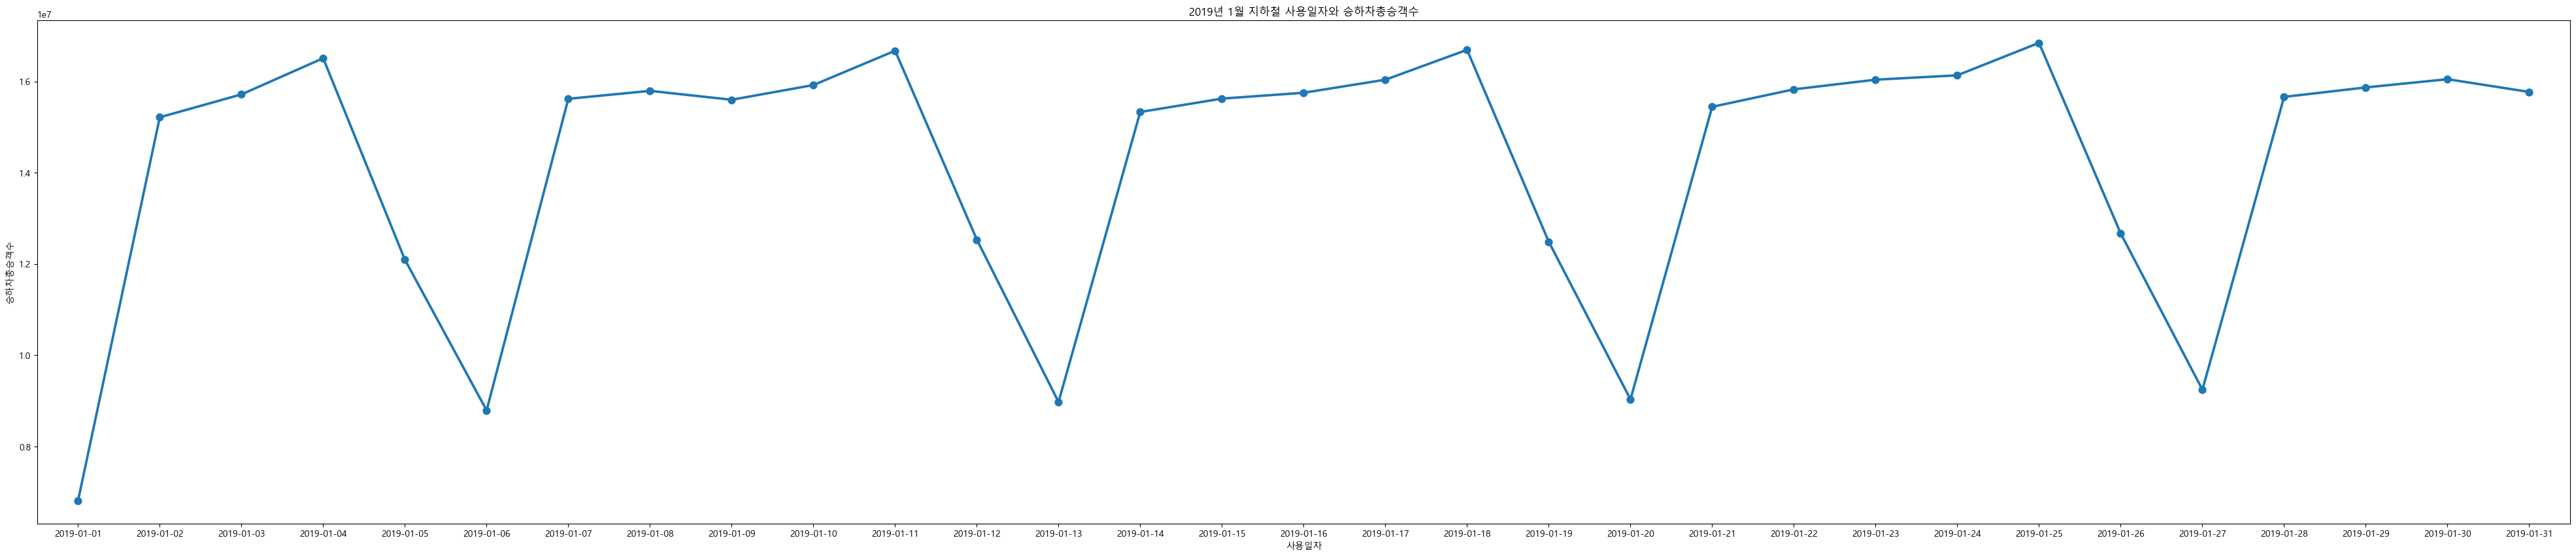

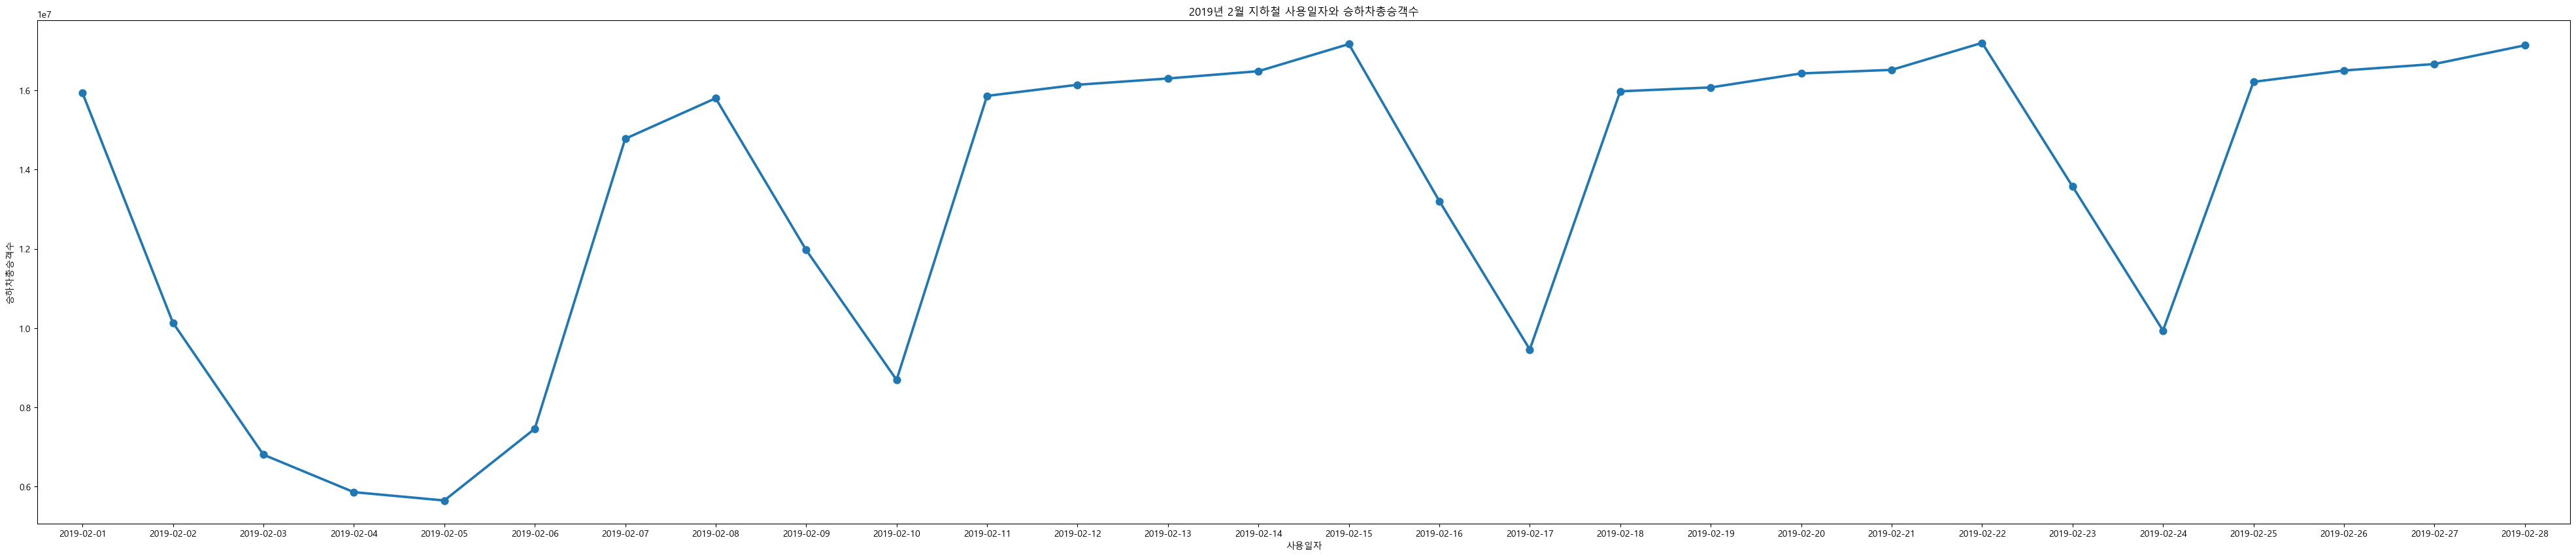

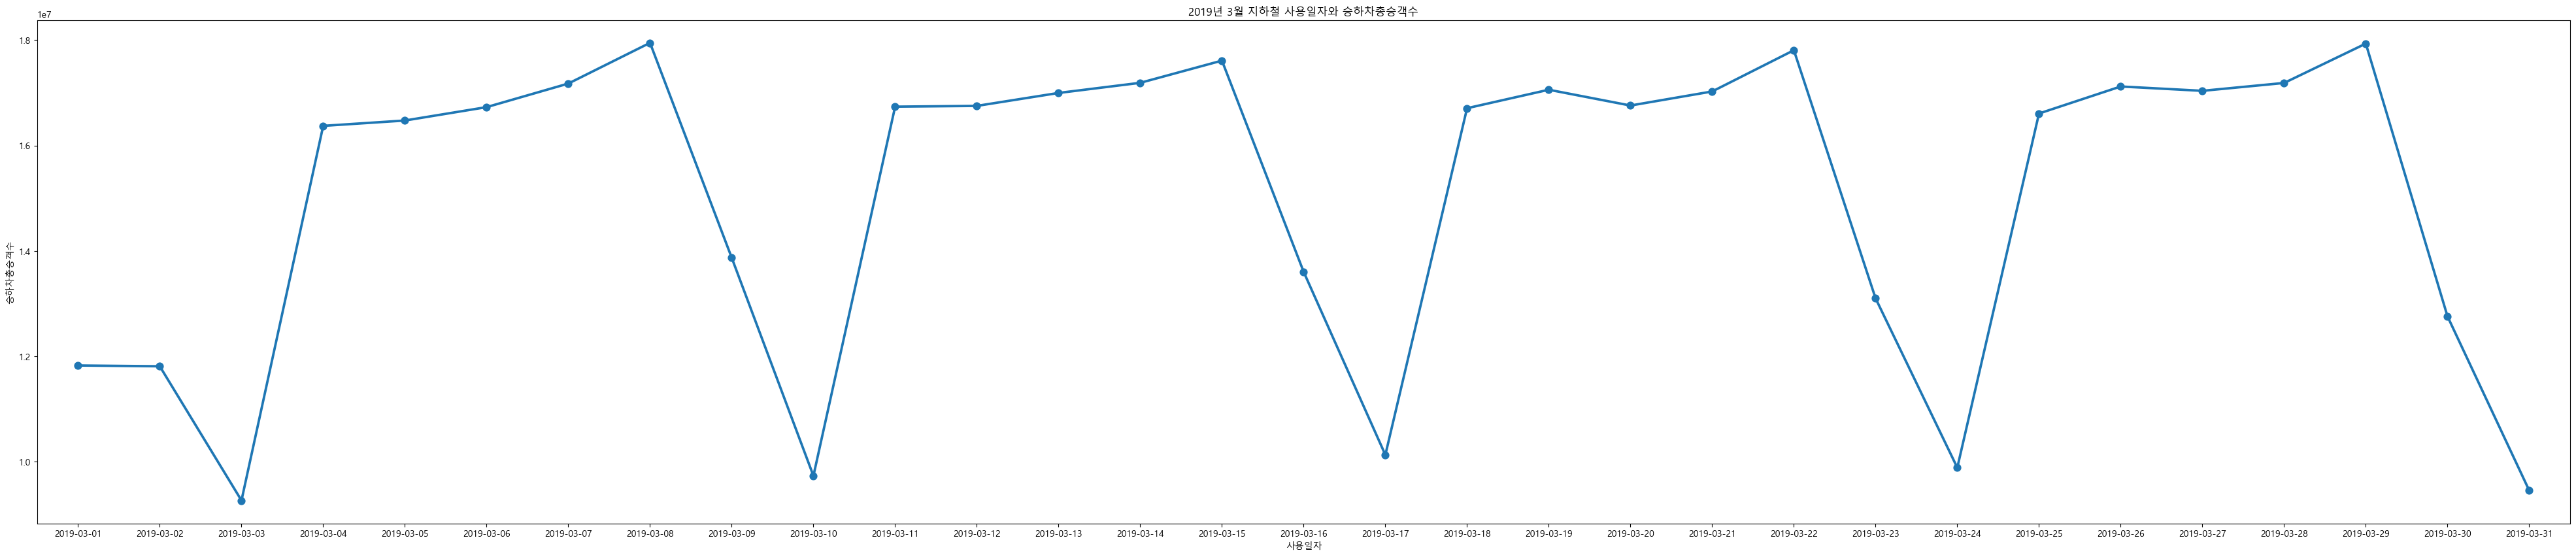

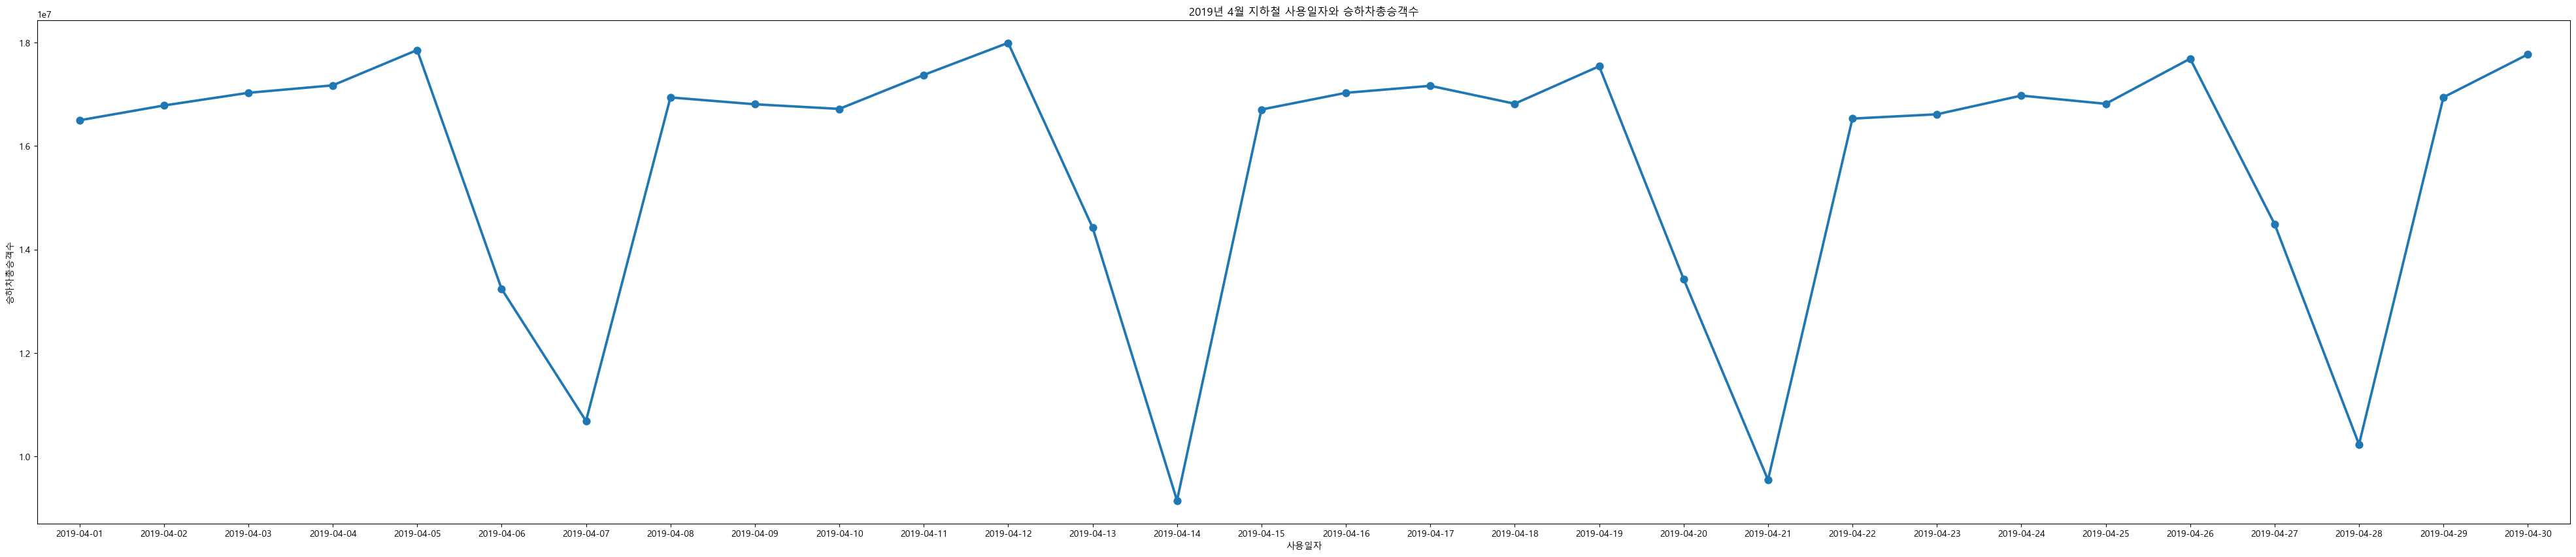

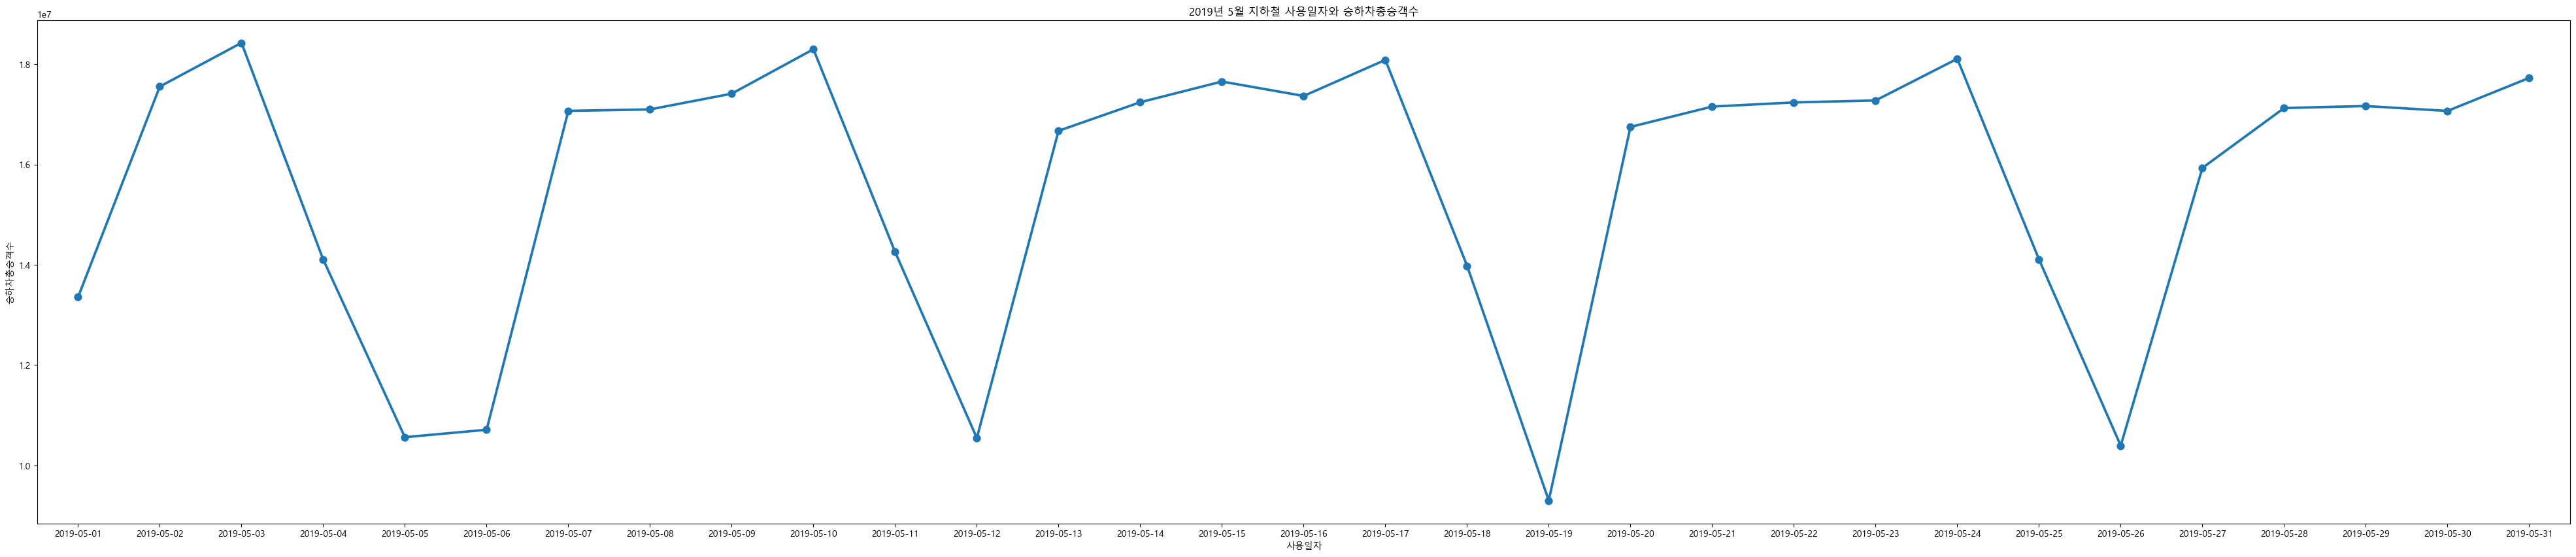

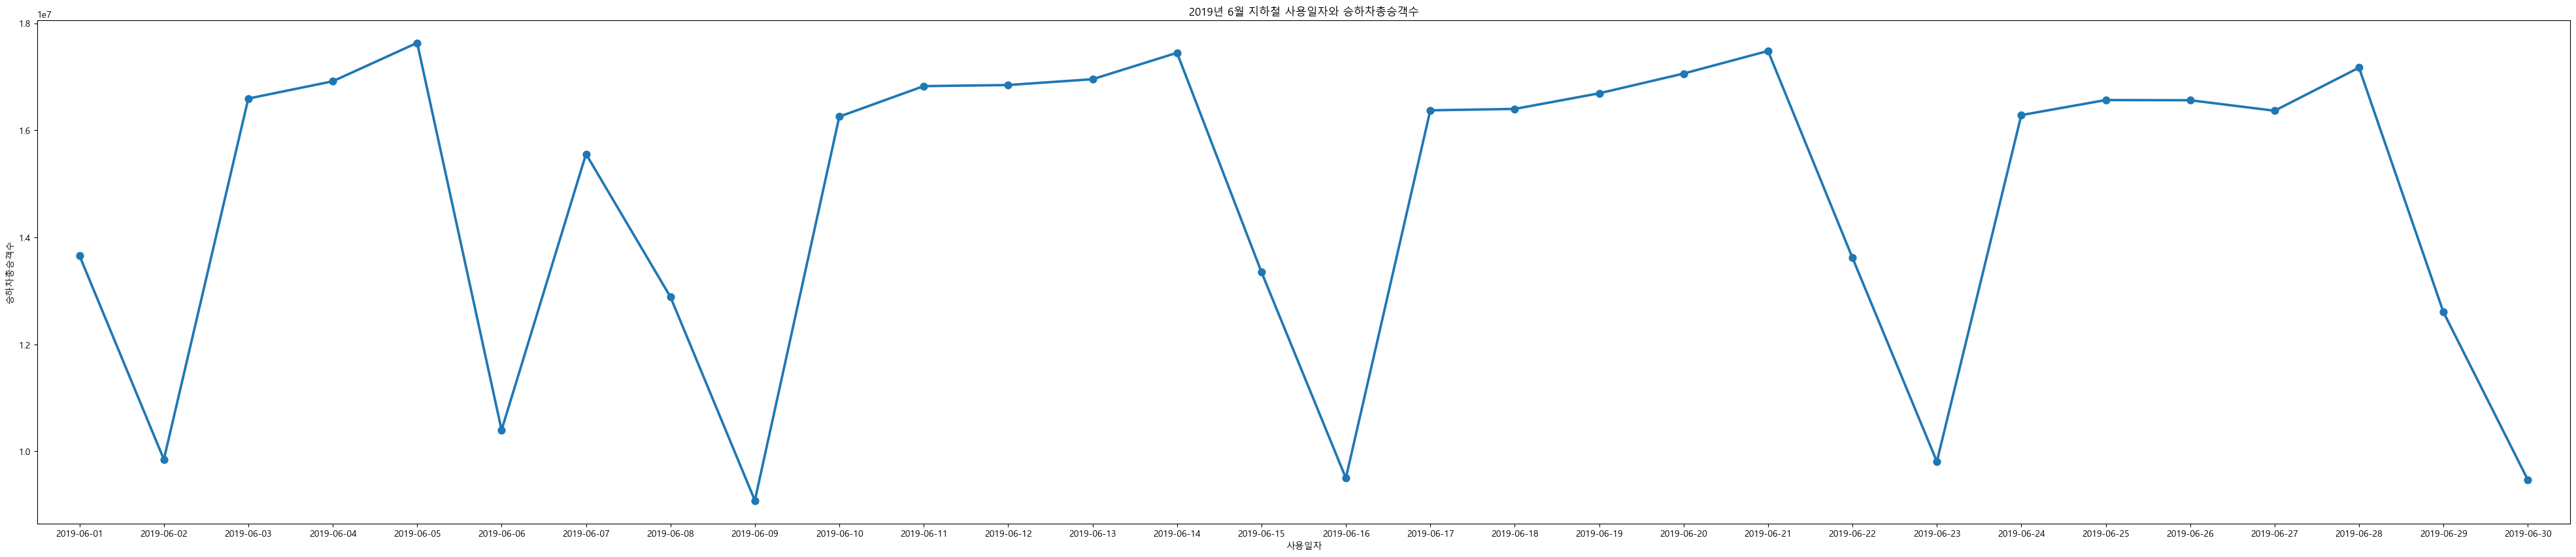

In [163]:
#4번 연월 각각에 대해 일자별(월일별) 승하차총승객수 그래프를 그려 볼까요?(pointplot)
import seaborn
import matplotlib.pyplot as plt

#1월
data_sums = raw.groupby('사용일자')['승하자총승객수'].sum()
mon_1=data_sums['2019-01-01':'2019-01-31']
s=pd.DataFrame(mon_1)
plt.figure(figsize=(50,10))
plt.title('2019년 1월 지하철 사용일자와 승하차총승객수')
plt.xlabel('사용일자')
plt.ylabel('승하차총승객수')
seaborn.pointplot(data=s, x='사용일자', y='승하자총승객수')
plt.show()

#2월
mon_2=data_sums['2019-02-01':'2019-02-28']
s=pd.DataFrame(mon_2)
plt.figure(figsize=(50,10))
plt.title('2019년 2월 지하철 사용일자와 승하차총승객수')
plt.xlabel('사용일자')
plt.ylabel('승하차총승객수')
seaborn.pointplot(data=s, x='사용일자', y='승하자총승객수')
plt.show()

#3월
mon_3=data_sums['2019-03-01':'2019-03-31']
s=pd.DataFrame(mon_3)
plt.figure(figsize=(50,10))
plt.title('2019년 3월 지하철 사용일자와 승하차총승객수')
plt.xlabel('사용일자')
plt.ylabel('승하차총승객수')
seaborn.pointplot(data=s, x='사용일자', y='승하자총승객수')
plt.show()

#4월
mon_4=data_sums['2019-04-01':'2019-04-30']
s=pd.DataFrame(mon_4)
plt.figure(figsize=(50,10))
plt.title('2019년 4월 지하철 사용일자와 승하차총승객수')
plt.xlabel('사용일자')
plt.ylabel('승하차총승객수')
seaborn.pointplot(data=s, x='사용일자', y='승하자총승객수')
plt.show()

#5월
mon_5=data_sums['2019-05-01':'2019-05-31']
s=pd.DataFrame(mon_5)
plt.figure(figsize=(50,10))
plt.title('2019년 5월 지하철 사용일자와 승하차총승객수')
plt.xlabel('사용일자')
plt.ylabel('승하차총승객수')
seaborn.pointplot(data=s, x='사용일자', y='승하자총승객수')
plt.show()

#6월
mon_6=data_sums['2019-06-01':'2019-06-30']
s=pd.DataFrame(mon_6)
plt.figure(figsize=(50,10))
plt.title('2019년 6월 지하철 사용일자와 승하차총승객수')
plt.xlabel('사용일자')
plt.ylabel('승하차총승객수')
seaborn.pointplot(data=s, x='사용일자', y='승하자총승객수')
plt.show()

In [164]:
#5번 가장 승객이 많이 타는 승차역은?
station_sums = raw.groupby('역명')['승하자총승객수'].sum()
station_max = station_sums.max()
station=station_sums[station_sums==station_max]
result=station.index[0]
print(f"가장 승객이 많이 타는 승차역은 {result}역 입니다.")

가장 승객이 많이 타는 승차역은 잠실역 입니다.


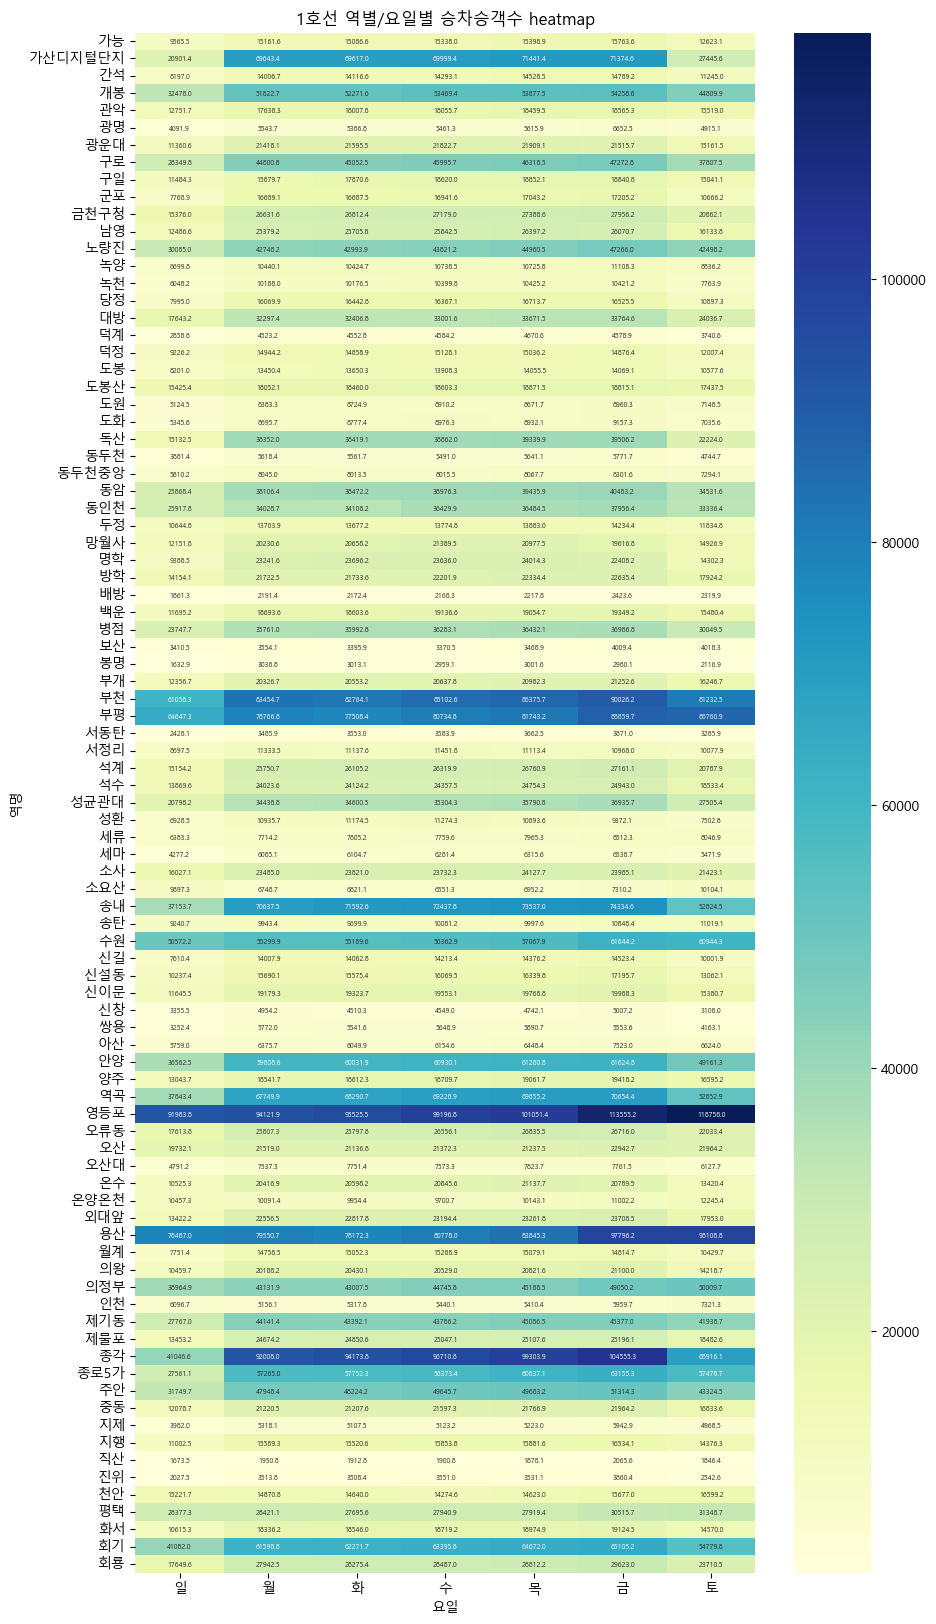

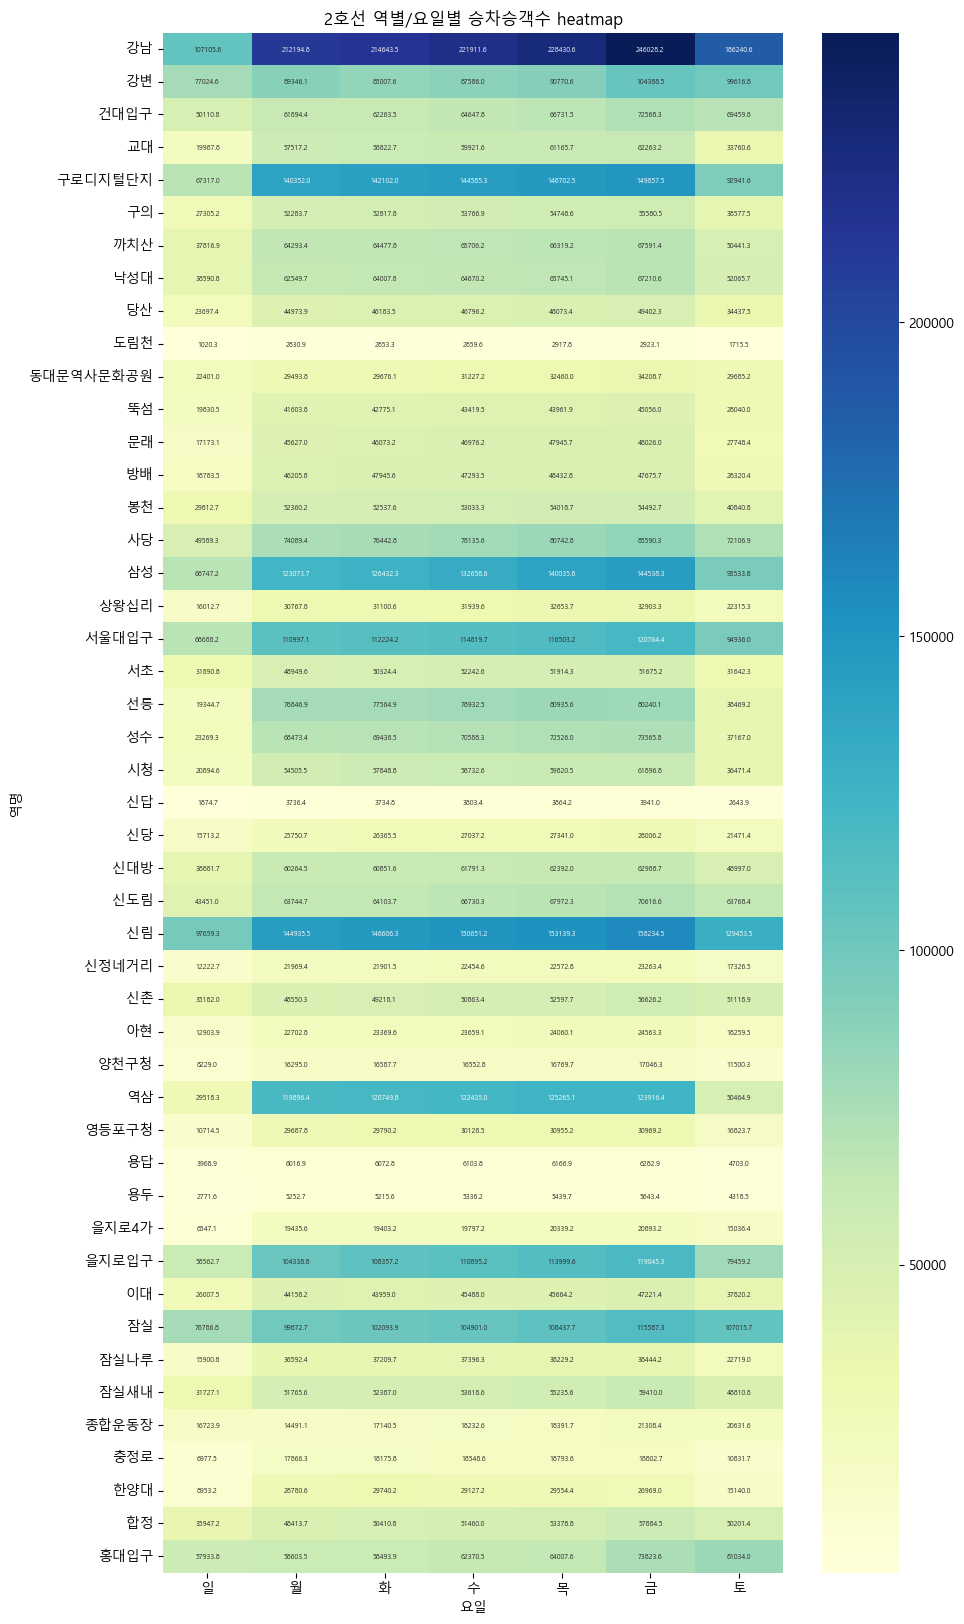

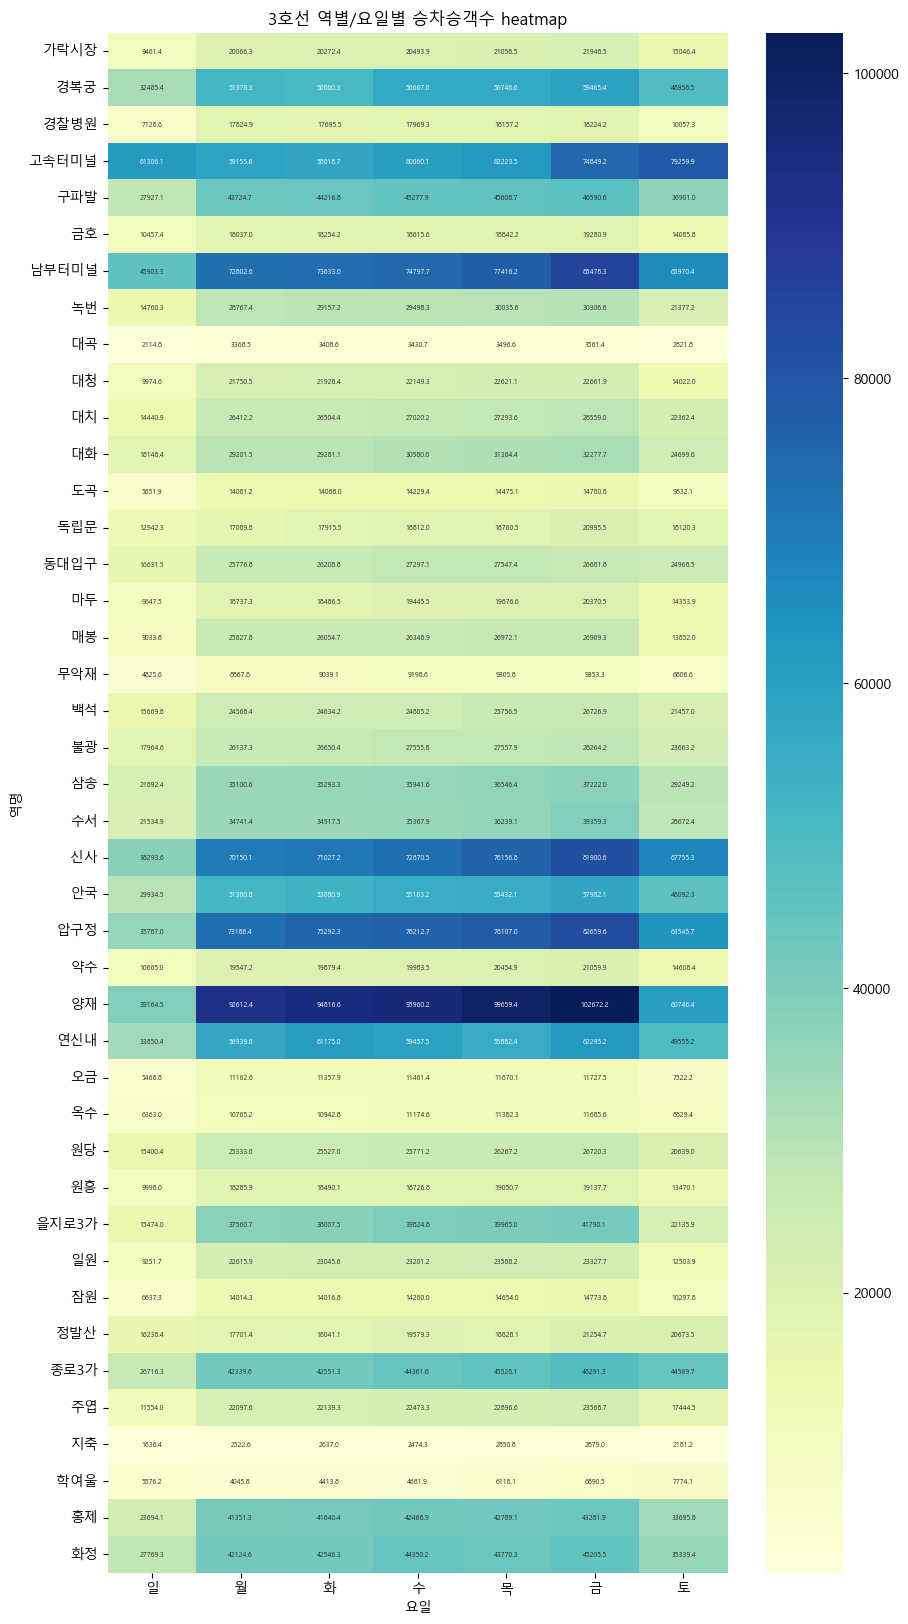

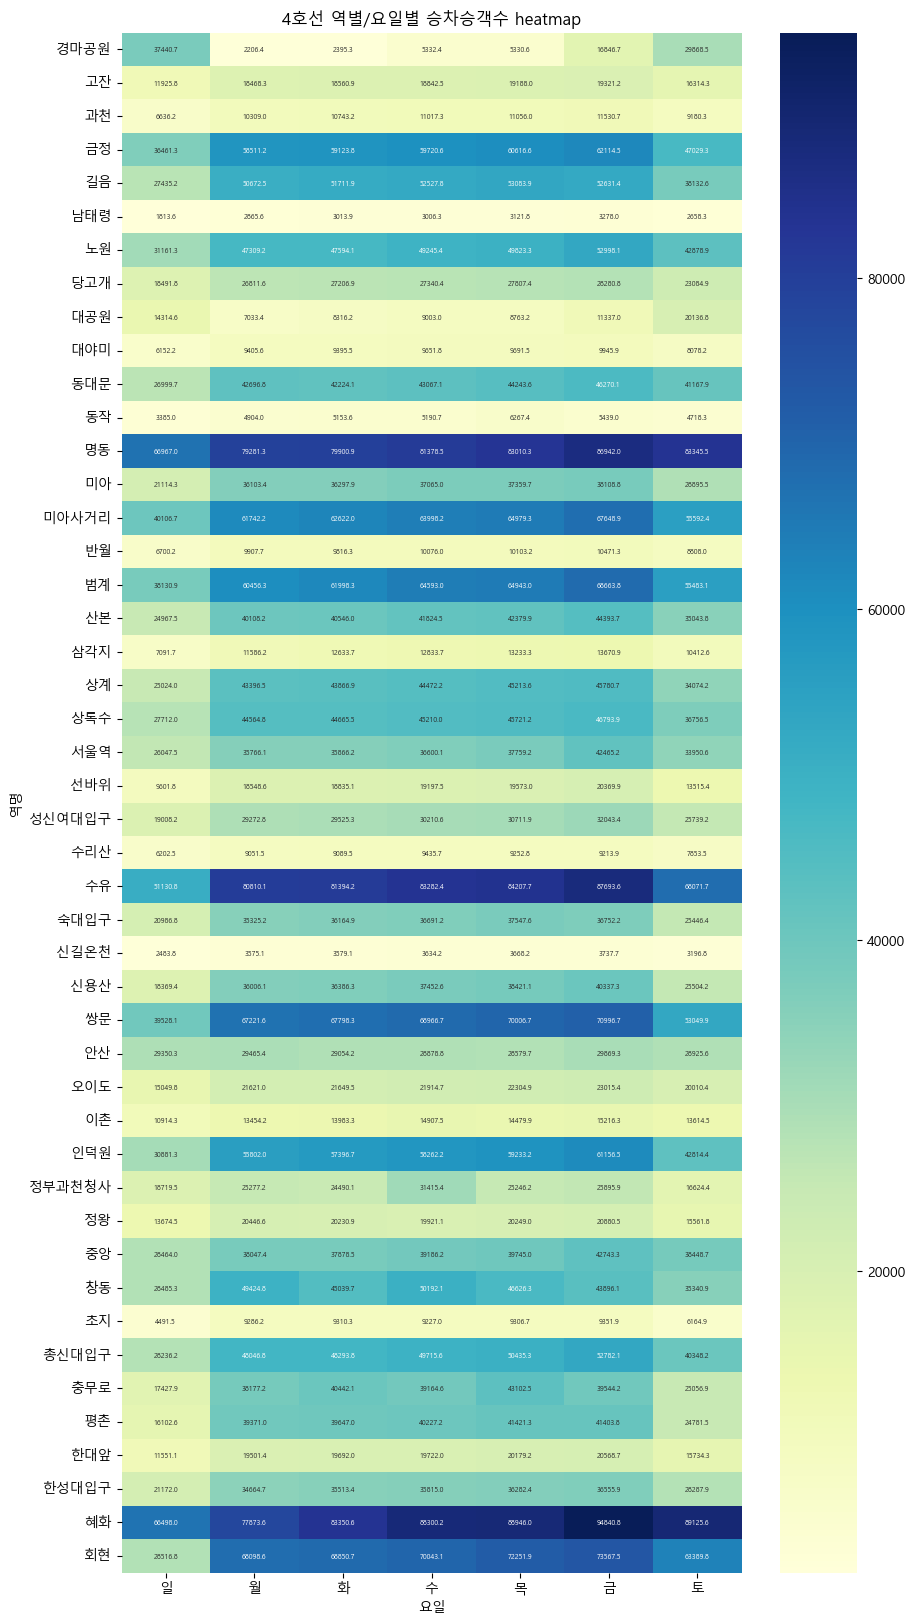

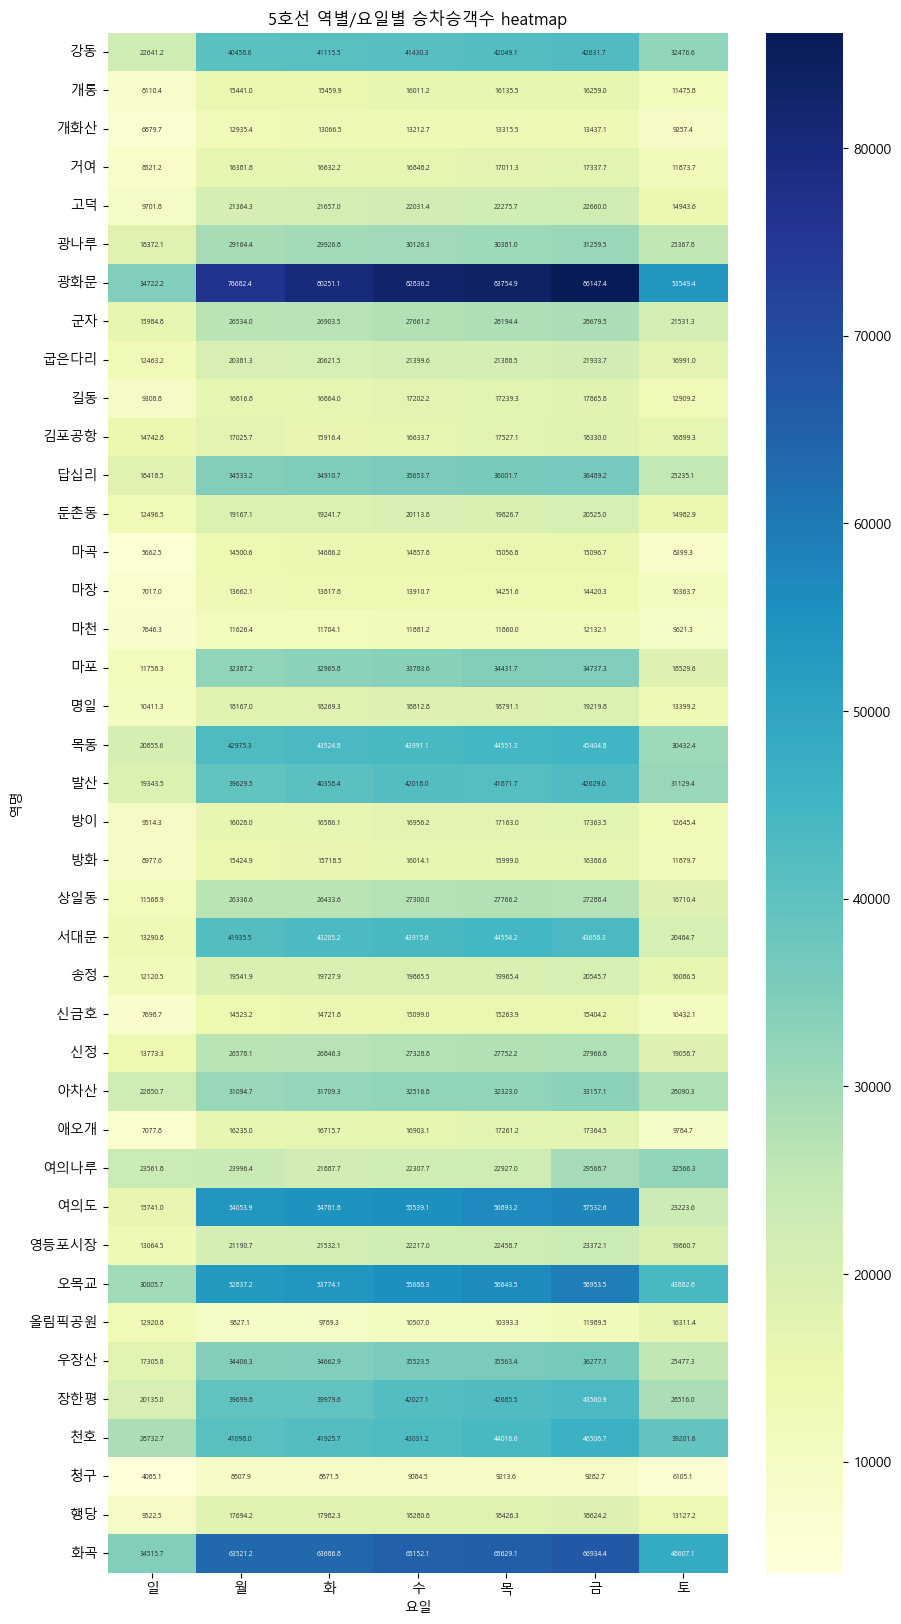

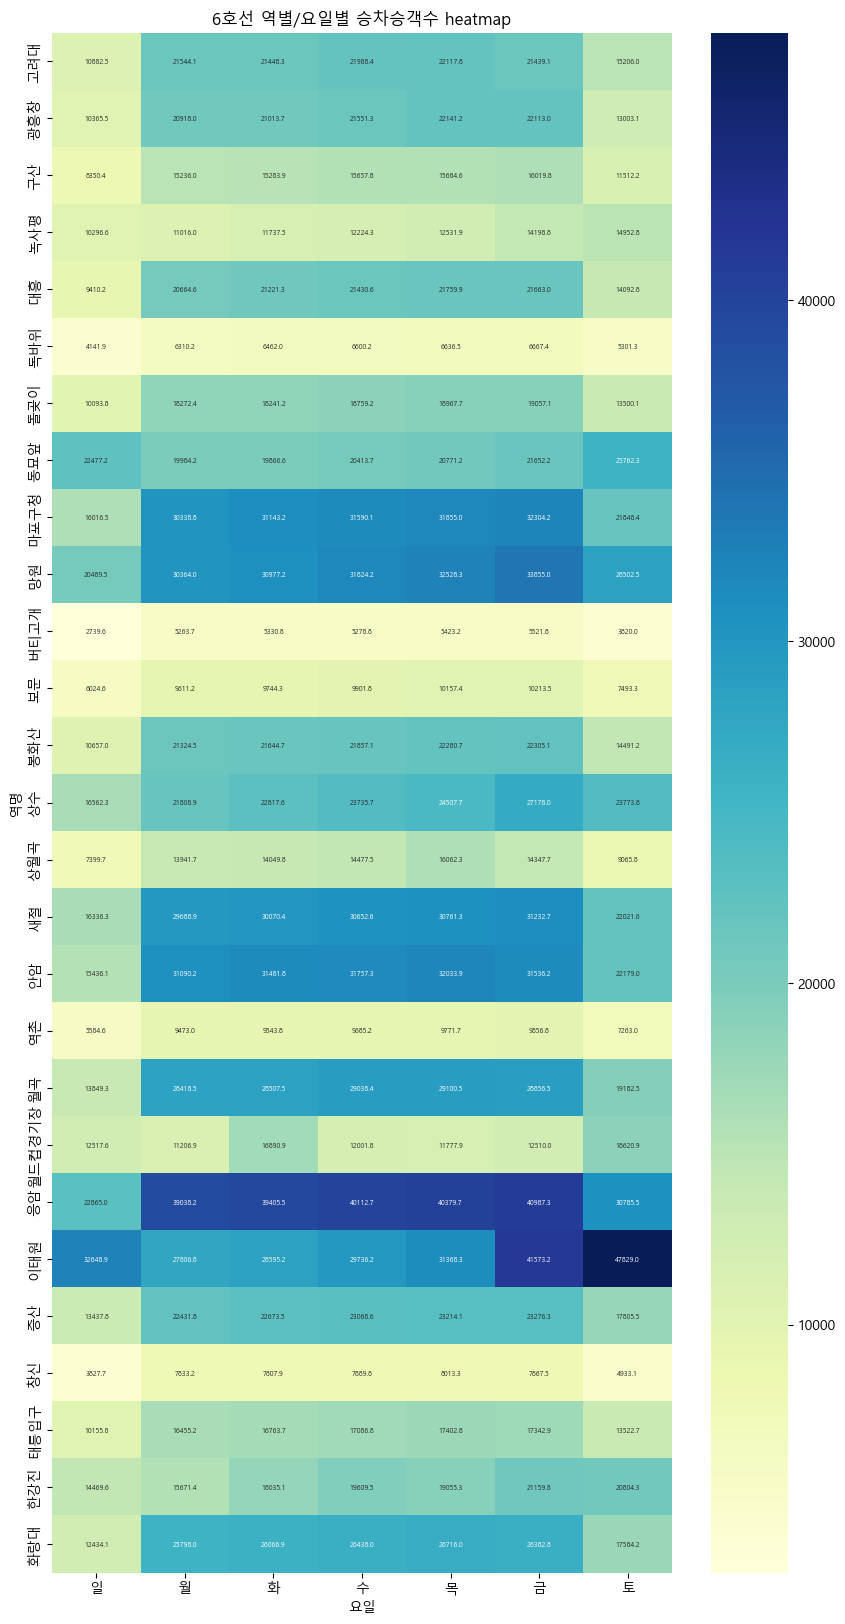

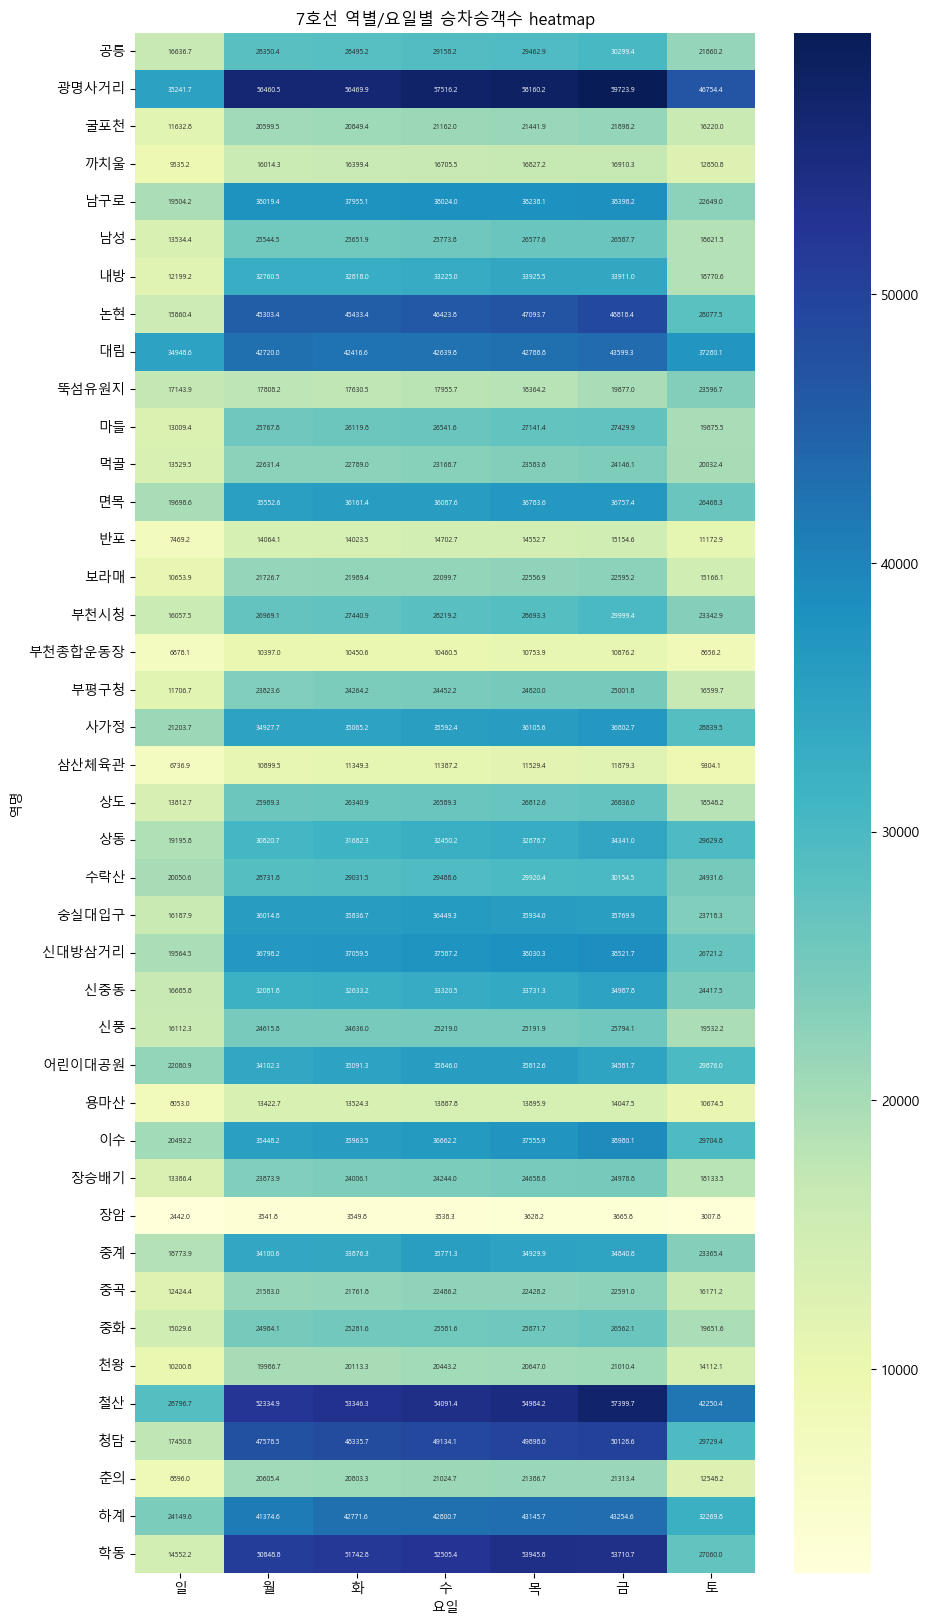

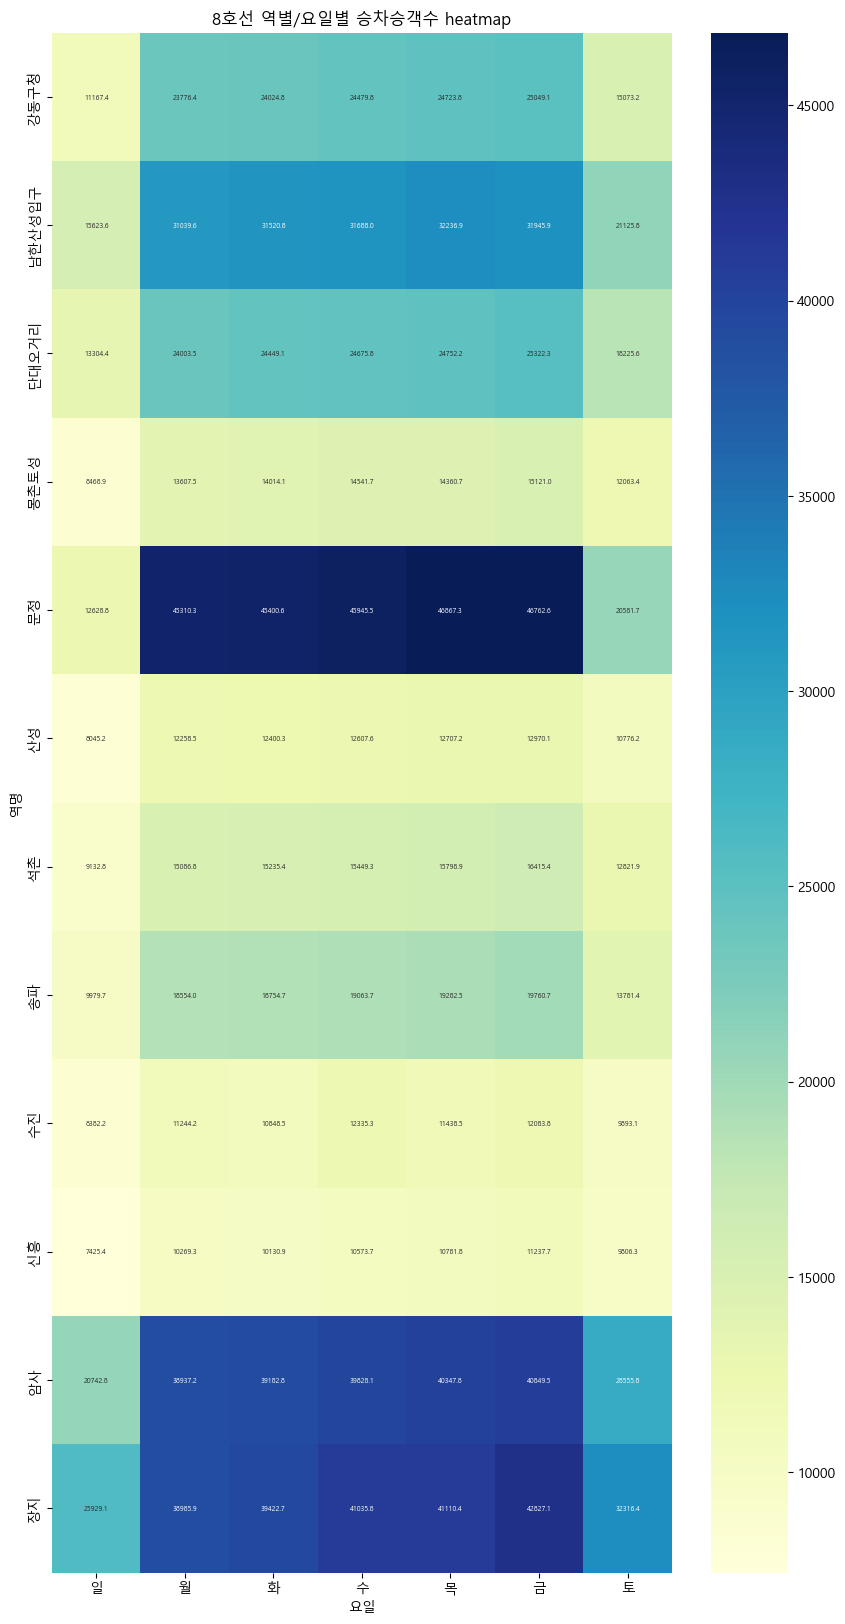

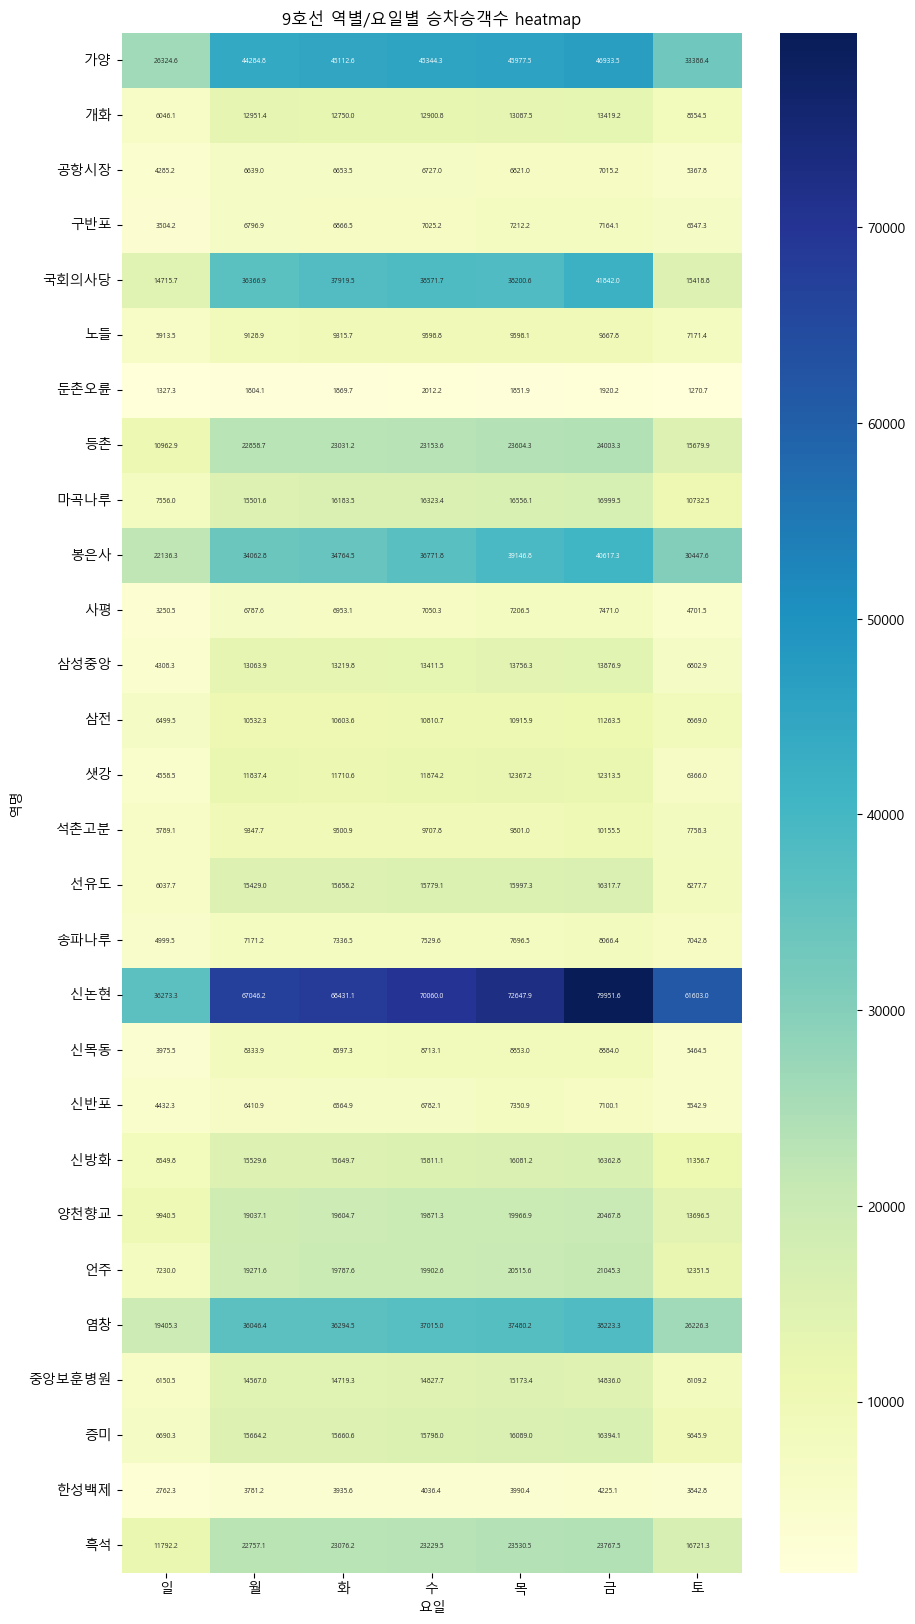

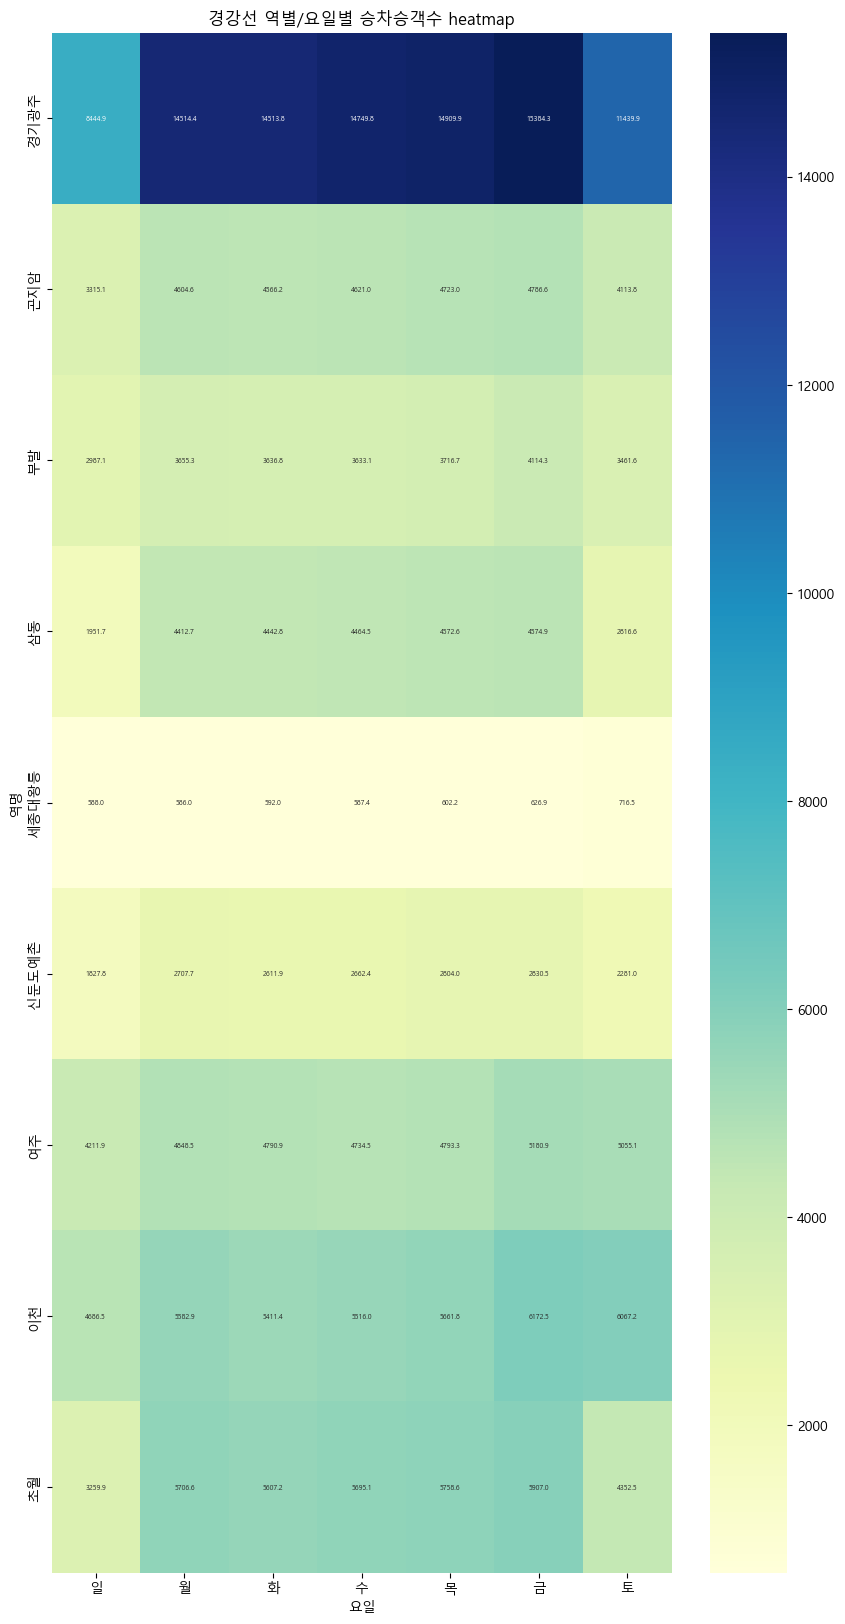

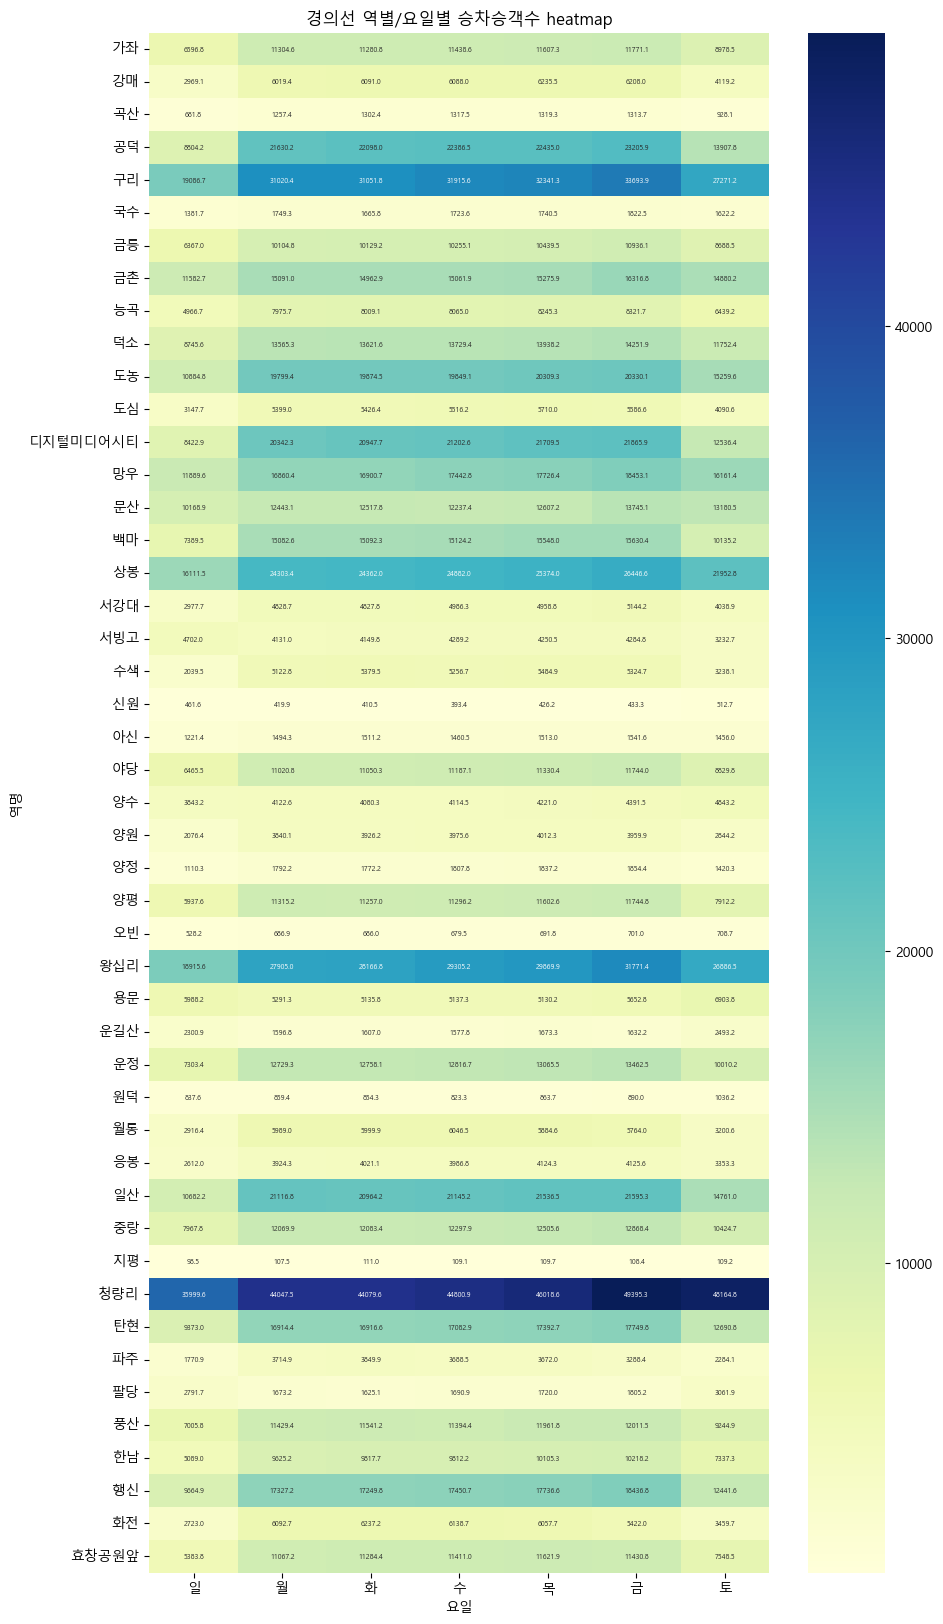

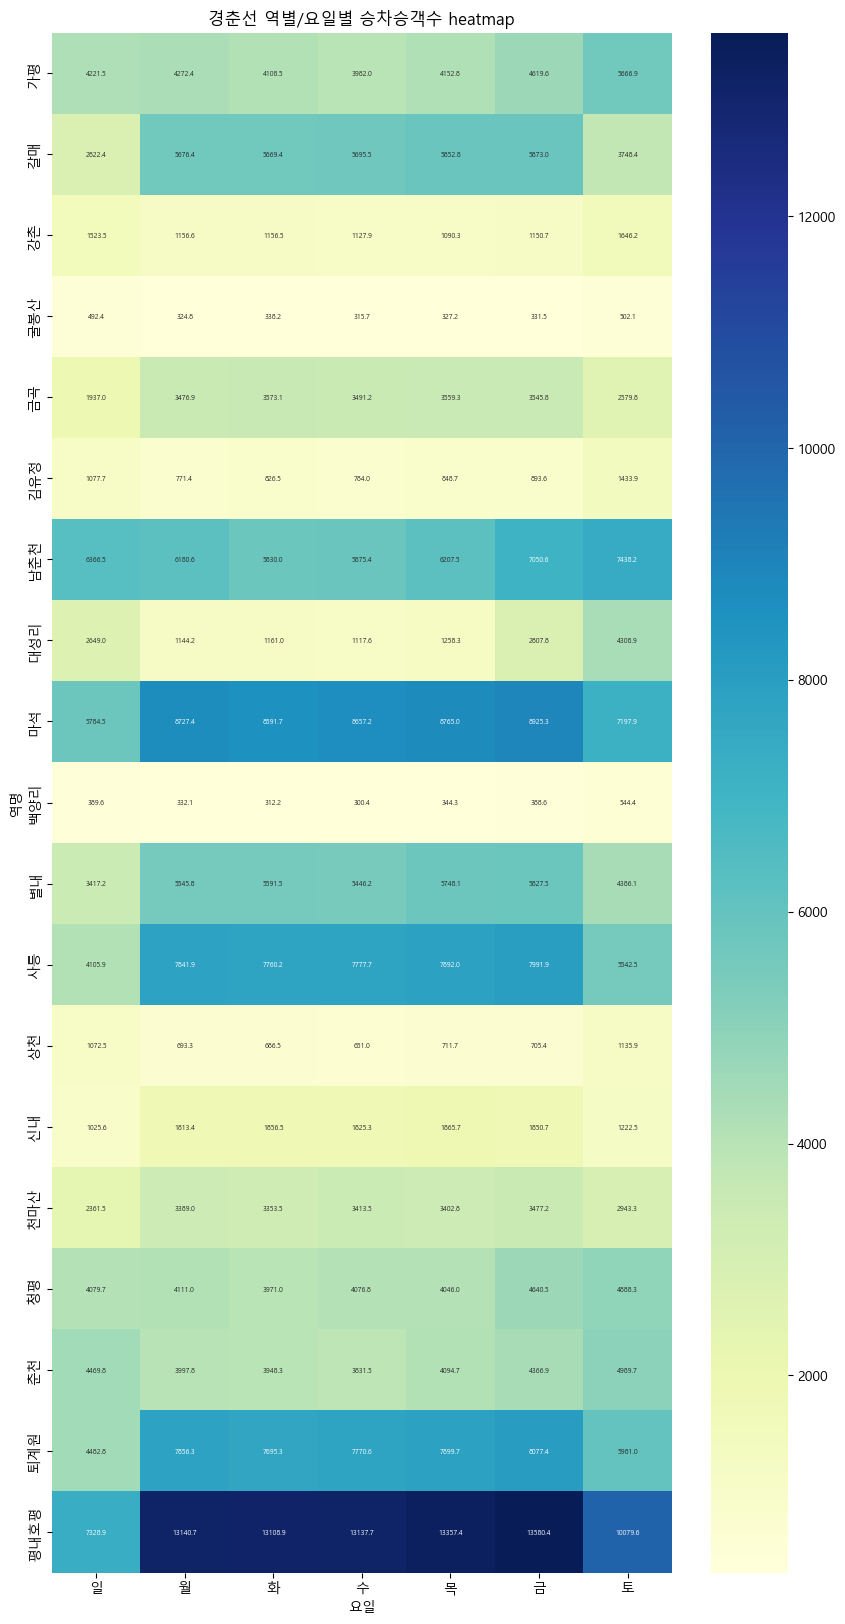

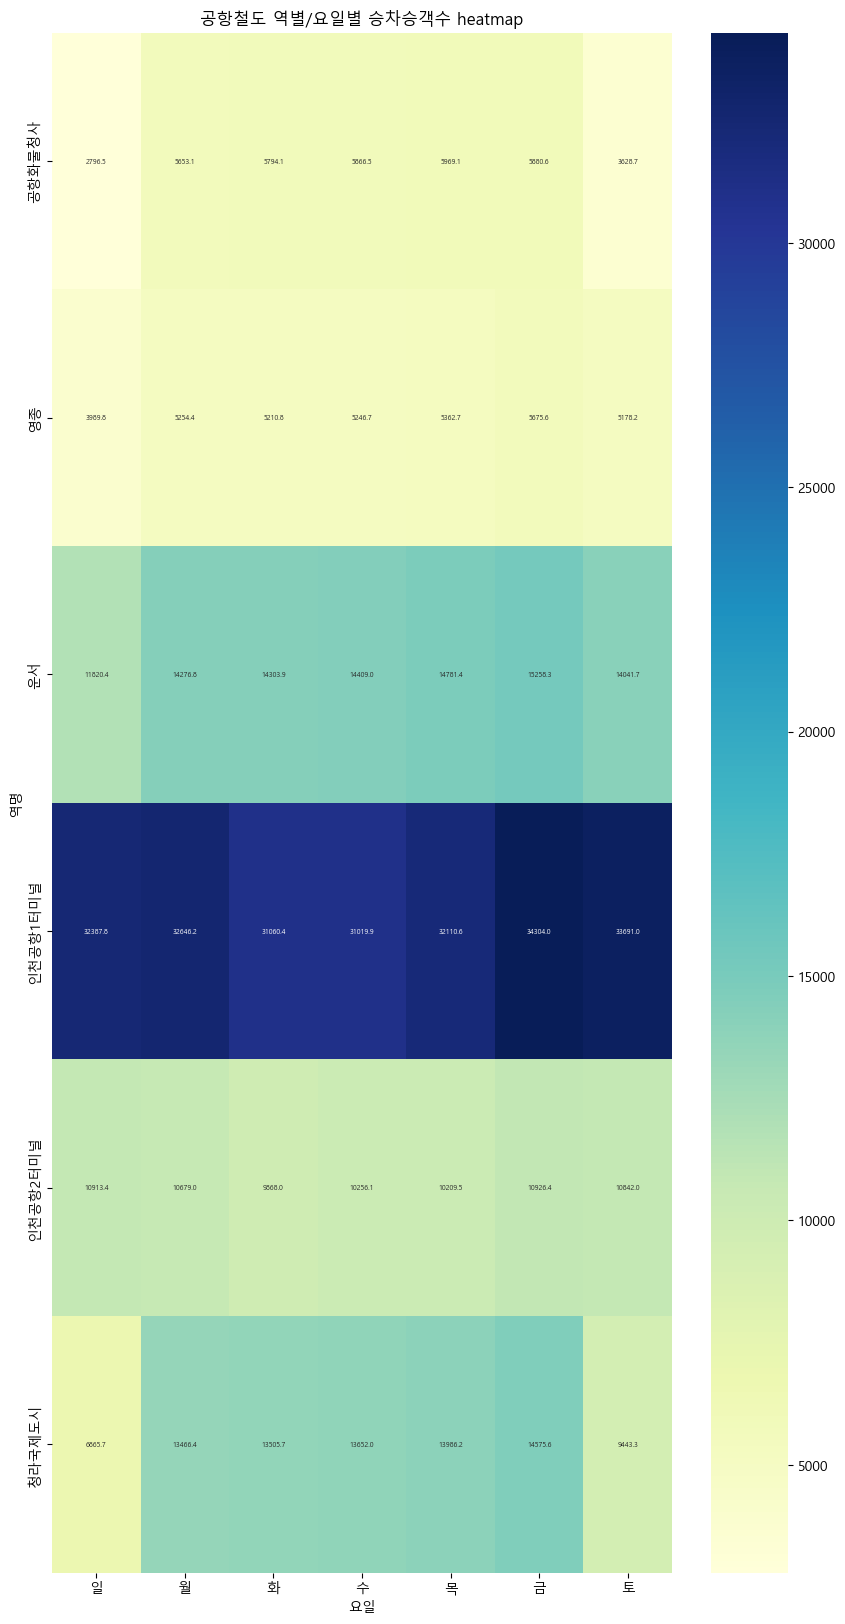

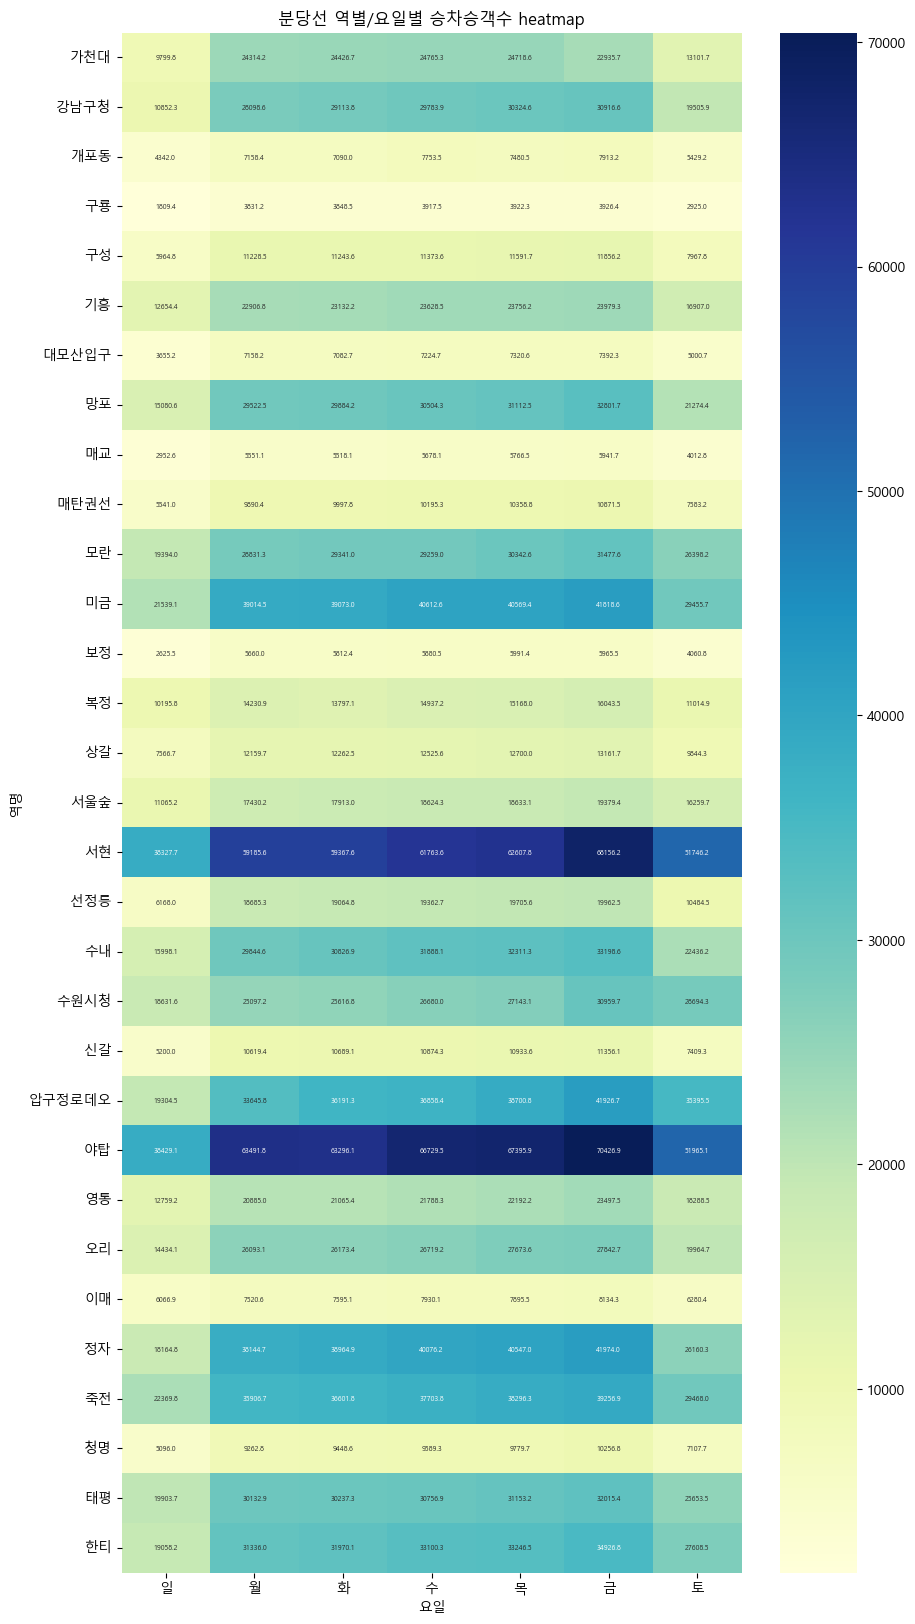

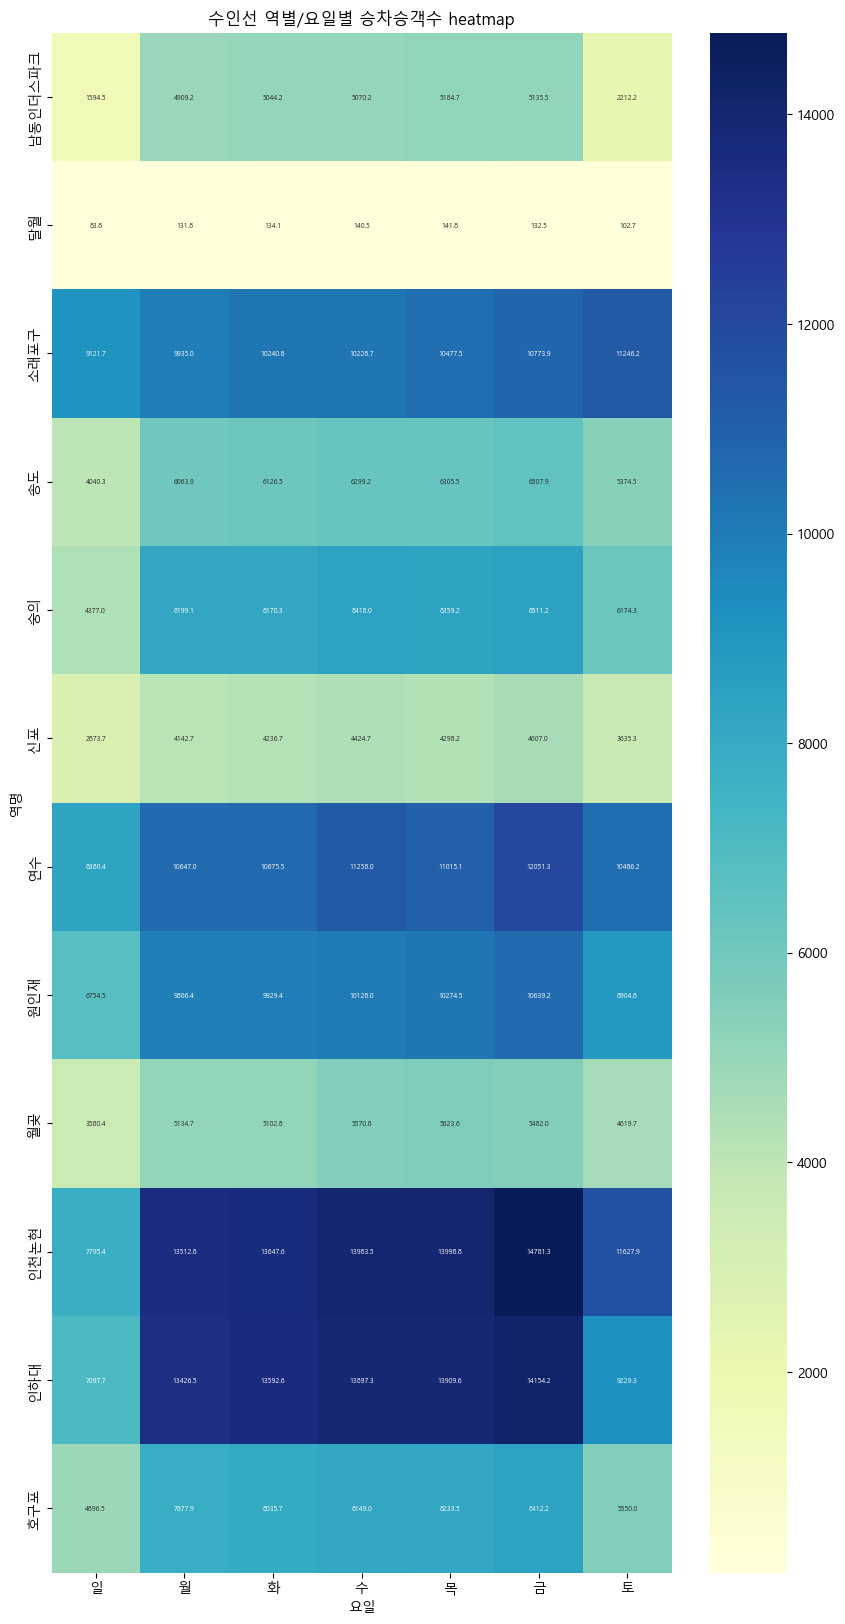

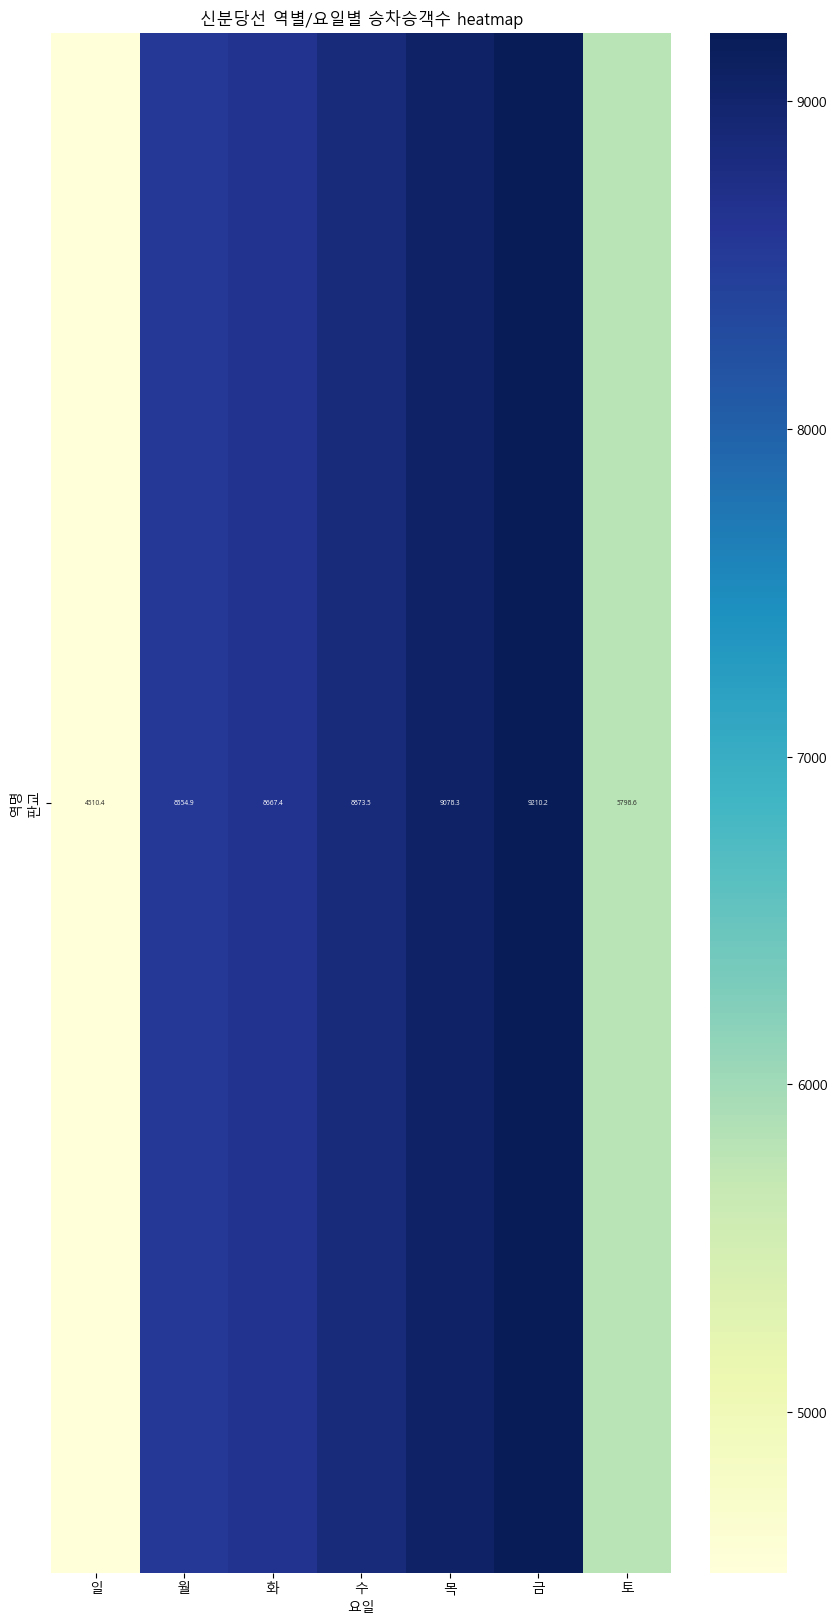

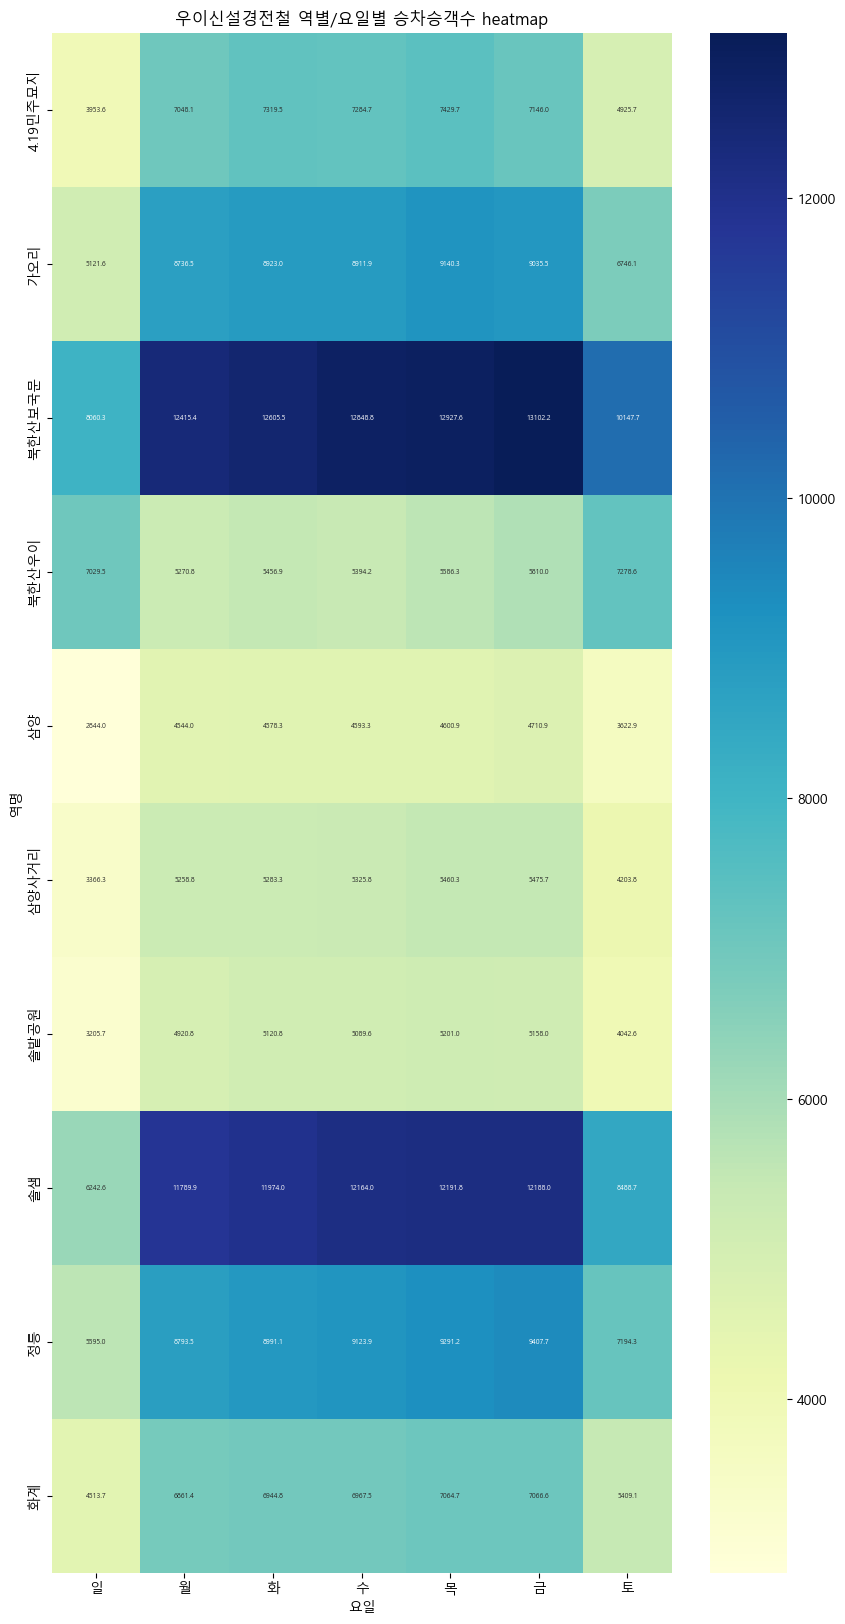

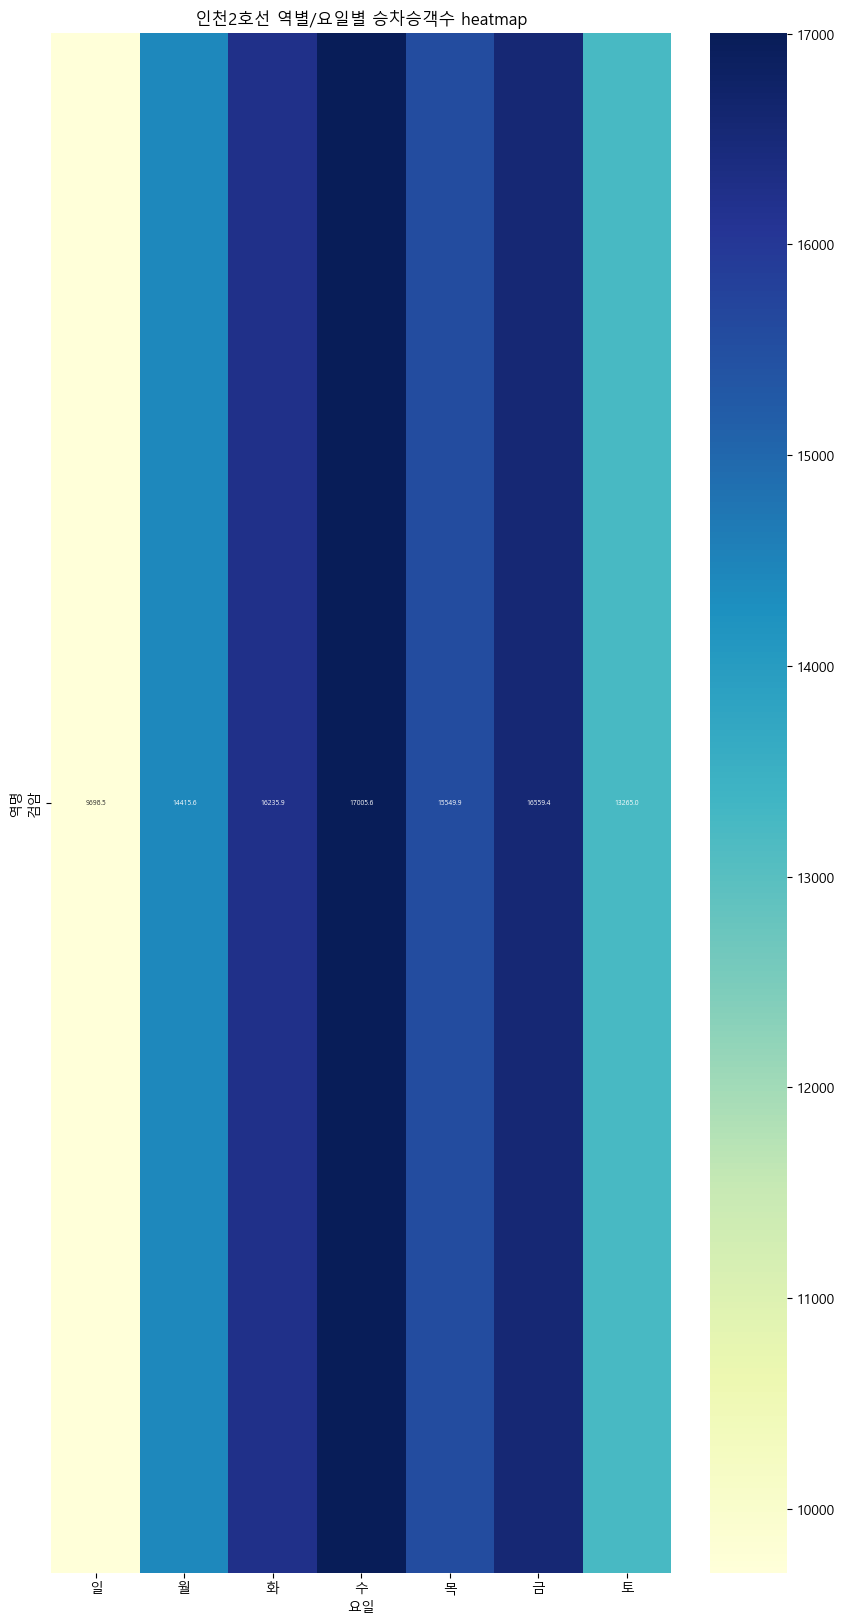

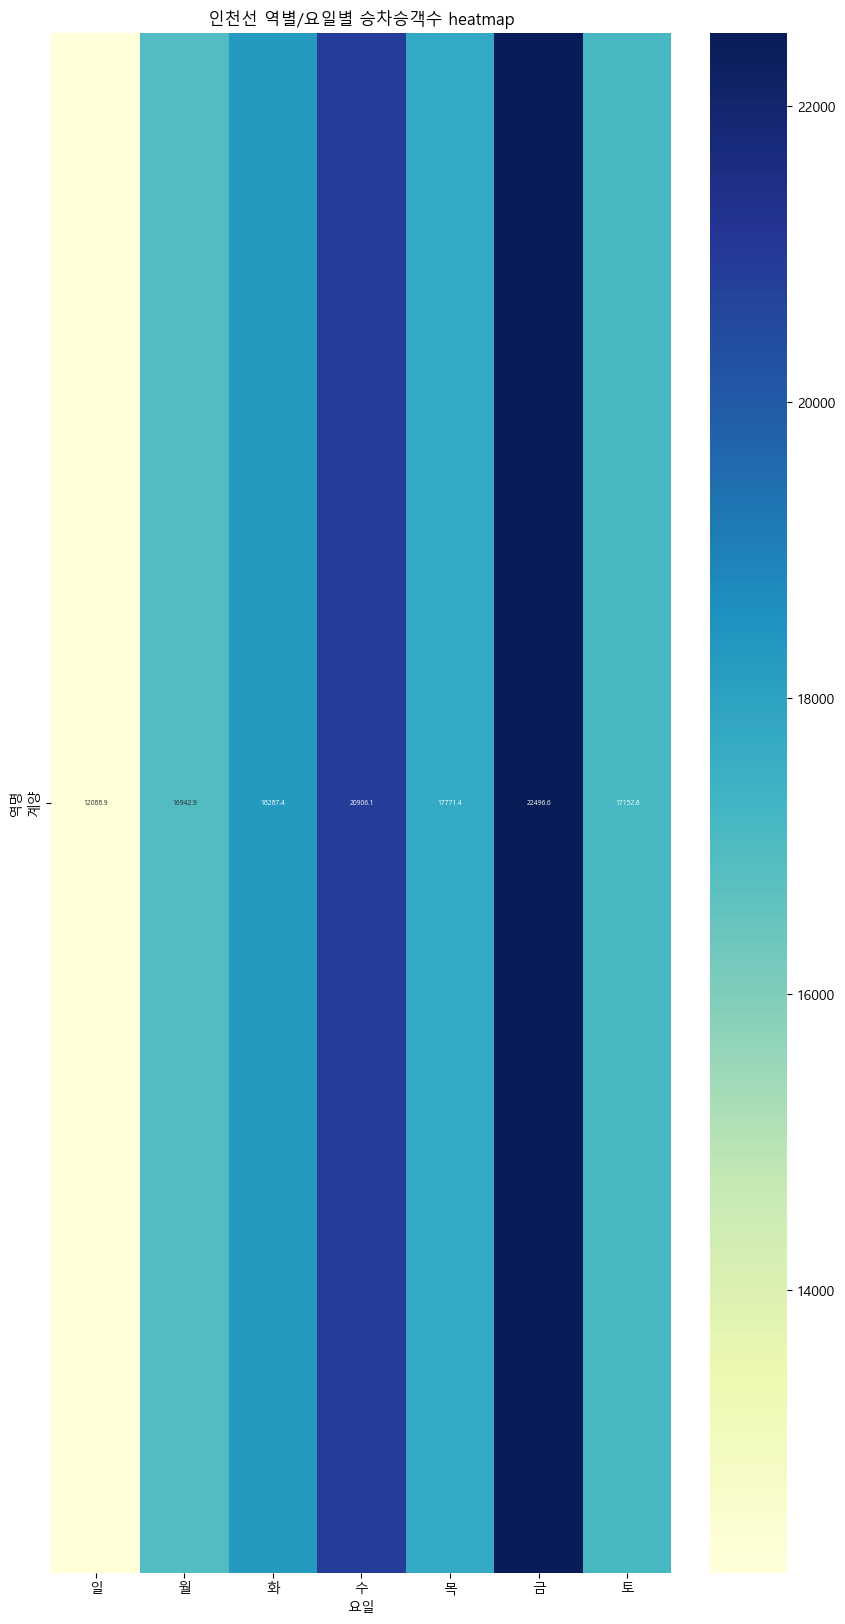

In [165]:
#6번 노선별로 역별/요일별 승차승객수를 비교해 볼 수 있을까?(1~9호선, 역별/요일별heatmap)
import seaborn
import matplotlib.pyplot as plt

new_df= raw.copy()[['요일','노선명','역명','승하자총승객수']]
new_df['요일'] = pd.Categorical(new_df['요일'], categories=['일','월','화','수','목','금','토'], ordered=True)
lines= new_df.노선명.unique()
lines.sort()
for line in lines:
    station = new_df[new_df['노선명'] == line]
    station = station.drop('노선명', axis=1)
    pivot = station.pivot_table(index='요일', columns='역명', values='승하자총승객수' ,observed=False)
    plt.figure(figsize=(10, 20))
    plt.title(f'{line} 역별/요일별 승차승객수 heatmap')
    seaborn.heatmap(pivot.T, cmap='YlGnBu', annot=True, annot_kws={'size':5}, fmt='0.1f')
    plt.show()

In [166]:
#7번 1호선에서 가장 하차를 많이 하는 역은?
new_df=raw[['노선명','역명','하차총승객수']]
data=new_df[new_df['노선명']=='1호선']
data_sums = data.groupby('역명')['하차총승객수'].sum()
max_station1=data_sums.max()
max_station = data_sums.idxmax()
print(f"1호선에서 가장 하차를 많이 하는 역은 {max_station1}명이 이용하는 {max_station}역 입니다")


1호선에서 가장 하차를 많이 하는 역은 10571381.0명이 이용하는 가산디지털단지역 입니다


In [167]:
#8번 2호선중에서 어느 역에서 승차가 가장 많이 발생할까?(Folium역 표시)
new_df=raw[['노선명','역명','승차총승객수']]
data=new_df[new_df['노선명']=='2호선']
data_sums = data.groupby('역명')['승차총승객수'].sum()
max_station = data_sums.idxmax()
print(f"2호선에서 가장 승차를 많이 하는 역은 {max_station}역 입니다")

import folium
file_2 = r'.\map\지하철노선위경도정보2.csv'
data=pd.read_csv(file_2)
data=data[data['호선']=='2호선']
data=data[data['역이름']==max_station]
lat=data[['위도']].values
long=data[['경도']].values

my_map=folium.Map(location=[lat,long], zoom_start=15)
folium.Marker(location=[lat,long], tooltip=f"{max_station}").add_to(my_map)
my_map

2호선에서 가장 승차를 많이 하는 역은 잠실역 입니다


In [168]:
#EDA 3주차

In [169]:
#가설1: 평일과 주말의 승하차총승객수는 유의미한 차이가 있다.
import pandas as pd
from scipy import stats

day_sums = raw.groupby(['사용일자', '요일'])['승하자총승객수'].sum()
day_sums_df = day_sums.reset_index()
work_passengers = (day_sums_df[day_sums_df['요일'].isin(['월','화','수','목','금'])].groupby('사용일자')['승하자총승객수'].sum())
weekend_passengers = (day_sums_df[day_sums_df['요일'].isin(['토','일'])].groupby('사용일자')['승하자총승객수'].sum())

t_statistic, p_value = stats.ttest_ind(work_passengers, weekend_passengers, equal_var=False)

print("=== T-검정 결과 ===")
print(f"T-통계량 (T-statistic): {t_statistic:.4f}")
print(f"P-value (유의확률): {p_value:.10f}")
print("--------------------")

if p_value < 0.05: 
    print(f"{p_value}가 유의수준 5%(0.05)미만이므로 귀무가설 기각: 평일과 주말의 승하차총승객수 평균은 유의한 차이가 있다.")
else:
    print(f"{p_value}가 유의수준 5%(0.05)이상이므로 귀무가설 채택: 평일과 주말의 승하차총승객수 평균은 유의한 차이가 없다.")

=== T-검정 결과 ===
T-통계량 (T-statistic): 14.6213
P-value (유의확률): 0.0000000000
--------------------
2.5063632968498773e-26가 유의수준 5%(0.05)미만이므로 귀무가설 기각: 평일과 주말의 승하차총승객수 평균은 유의한 차이가 있다.


In [170]:
def ANOVA(*groups):
    from scipy.stats import f_oneway
    f_stat, p_value = f_oneway(*groups)

    print("=== ANOVA 결과 ===")
    print(f"F-statistic: {f_stat:.4f}")
    print(f"p-value: {p_value:.10f}")


    if p_value < 0.05: 
        print(f"{p_value}가 유의수준 5%(0.05)미만이므로 귀무가설 기각")
        return True
    else:
        print(f"{p_value}가 유의수준 5%(0.05)이상이므로 귀무가설 채택")
        return False

In [171]:
#가설2: 2019.1~6월간 승하차총승객수가 유의미한 차이가 있다.
date_sums = raw.groupby('사용일자')['승하자총승객수'].sum()
date_sums = date_sums.reset_index()  
date_sums['연월'] = pd.to_datetime(date_sums['사용일자']).dt.to_period('M')
groups = [g['승하자총승객수'].values for _, g in date_sums.groupby('연월')]
ans=ANOVA(*groups)
if ans == True:
    print("월별 승하차총승객수에 유의미한 차이가 있다.")
else:
    print("월별 승하차총승객수에 유의미한 차이가 없다.")

=== ANOVA 결과 ===
F-statistic: 2.2174
p-value: 0.0546160521
0.05461605214400852가 유의수준 5%(0.05)이상이므로 귀무가설 채택
월별 승하차총승객수에 유의미한 차이가 없다.


In [172]:
#가설3: 2019.1~6월간 노선별 승하차총승객수가 유의미한 차이가 있다.
station_sums = raw.groupby(['사용일자','노선명'])['승하자총승객수'].sum()
station_sums = station_sums.reset_index()
groups = [group['승하자총승객수'].values for _, group in station_sums.groupby('노선명')]
ans=ANOVA(*groups)
if ans == True:
    print("노선별 승하차총객수에 유의한 차이가 있다.")
else:
    print("노선별 승하차총객수에 유의한 차이가 없다.")


=== ANOVA 결과 ===
F-statistic: 2636.2394
p-value: 0.0000000000
0.0가 유의수준 5%(0.05)미만이므로 귀무가설 기각
노선별 승하차총객수에 유의한 차이가 있다.


In [173]:
#가설4: 상명대학교가 학기 중일 때와 방학 중일 때 경복궁역 승하차총승객수는 유의한 차이가 있다. 
data_Gyeongbokgung = raw[raw['역명'] == '경복궁']
no_school_Gyeongbokgung=data_Gyeongbokgung[(data_Gyeongbokgung['사용일자'] >= '2019-01-01') & (data_Gyeongbokgung['사용일자'] <= '2019-02-28')]
yes_school_Gyeongbokgung=data_Gyeongbokgung[(data_Gyeongbokgung['사용일자'] >= '2019-03-01') & (data_Gyeongbokgung['사용일자'] <= '2019-06-30')]

no_school_Gyeongbokgung=no_school_Gyeongbokgung.groupby('사용일자')['승하자총승객수'].mean()
yes_school_Gyeongbokgung=yes_school_Gyeongbokgung.groupby('사용일자')['승하자총승객수'].mean()

t_statistic, p_value = stats.ttest_ind(no_school_Gyeongbokgung, yes_school_Gyeongbokgung, equal_var=False)

print("=== T-검정 결과 ===")
print(f"T-통계량 (T-statistic): {t_statistic:.4f}")
print(f"P-value (유의확률): {p_value:.10f}")
print("--------------------")

if p_value < 0.05: 
    print(f"{p_value}가 유의수준 5%(0.05)미만이므로 귀무가설 기각: 상명대학교가 학기 중일 때와 방학 중일 때 경복궁역 승하차총승객수는 유의한 차이가 있다.")
else:
    print(f"{p_value}가 유의수준 5%(0.05)이상이므로 귀무가설 채택: 상명대학교가 학기 중일 때와 방학 중일 때 경복궁역 승하차총승객수는 유의한 차이가 .")


no_school_total_Gyeongbokgung=no_school_Gyeongbokgung.mean()
print(f"상명대학교가 방학일 때 경복궁역의 승하차총승객수 평균: {int(no_school_total_Gyeongbokgung)}명/일")
yes_school_total_Gyeongbokgung=yes_school_Gyeongbokgung.mean()
print(f"상명대학교가 학기 중일 때 경복궁역의 승하차총승객수 평균: {int(yes_school_total_Gyeongbokgung)}명/일")

=== T-검정 결과 ===
T-통계량 (T-statistic): -4.8261
P-value (유의확률): 0.0000041654
--------------------
4.165394627996515e-06가 유의수준 5%(0.05)미만이므로 귀무가설 기각: 상명대학교가 학기 중일 때와 방학 중일 때 경복궁역 승하차총승객수는 유의한 차이가 있다.
상명대학교가 방학일 때 경복궁역의 승하차총승객수 평균: 45673명/일
상명대학교가 학기 중일 때 경복궁역의 승하차총승객수 평균: 53479명/일


In [174]:
#가설5: 상명대학교가 학기 중일 때와 방학 중일 때 홍제역 승하차총승객수는 유의한 차이가 있다. 
data_Hongje = raw[raw['역명'] == '홍제']
no_school_Hongje=data_Hongje[(data_Hongje['사용일자'] >= '2019-01-01') & (data_Hongje['사용일자'] <= '2019-02-28')]
yes_school_Hongje=data_Hongje[(data_Hongje['사용일자'] >= '2019-03-01') & (data_Hongje['사용일자'] <= '2019-06-30')]

no_school_Hongje=no_school_Hongje.groupby('사용일자')['승하자총승객수'].mean()
yes_school_Hongje=yes_school_Hongje.groupby('사용일자')['승하자총승객수'].mean()

t_statistic, p_value = stats.ttest_ind(no_school_Hongje, yes_school_Hongje, equal_var=False)

print("=== T-검정 결과 ===")
print(f"T-통계량 (T-statistic): {t_statistic:.4f}")
print(f"P-value (유의확률): {p_value:.15f}")
print("--------------------")

if p_value < 0.05: 
    print(f"{p_value}가 유의수준 5%(0.05)미만이므로 귀무가설 기각: 상명대학교가 학기 중일 때와 방학 중일 때 홍제역 승하차총승객수는 유의한 차이가 있다.")
else:
    print(f"{p_value}가 유의수준 5%(0.05)이이므로 귀무가설 채택: 상명대학교가 학기 중일 때와 방학 중일 때 홍제역 승하차총승객수는 유의한 차이가 .")


no_school_total_Hongje=no_school_Hongje.mean()
print(f"상명대학교가 방학일 때 홍제역의 승하차총승객수 평균: {int(no_school_total_Hongje)}명/일")
yes_school_total_Hongje=yes_school_Hongje.mean()
print(f"상명대학교가 학기 중일 때 홍제역의 승하차총승객수: {int(yes_school_total_Hongje)}명/일")

=== T-검정 결과 ===
T-통계량 (T-statistic): -3.3393
P-value (유의확률): 0.001149342238521
--------------------
0.0011493422385210725가 유의수준 5%(0.05)미만이므로 귀무가설 기각: 상명대학교가 학기 중일 때와 방학 중일 때 홍제역 승하차총승객수는 유의한 차이가 있다.
상명대학교가 방학일 때 홍제역의 승하차총승객수 평균: 35470명/일
상명대학교가 학기 중일 때 홍제역의 승하차총승객수: 39818명/일


노선명
2호선        620950820.0
1호선        442595645.0
4호선        336819726.0
3호선        296507251.0
5호선        213739705.0
7호선        205199875.0
분당선        135962111.0
경의선        127579565.0
6호선        100925682.0
9호선         84803325.0
8호선         49393731.0
수인선         16159276.0
공항철도        14395020.0
경춘선         14028191.0
우이신설경전철     12938033.0
경강선          7965355.0
인천선          3839332.0
인천2호선        2922652.0
신분당선         1413470.0
Name: 승하자총승객수, dtype: float64


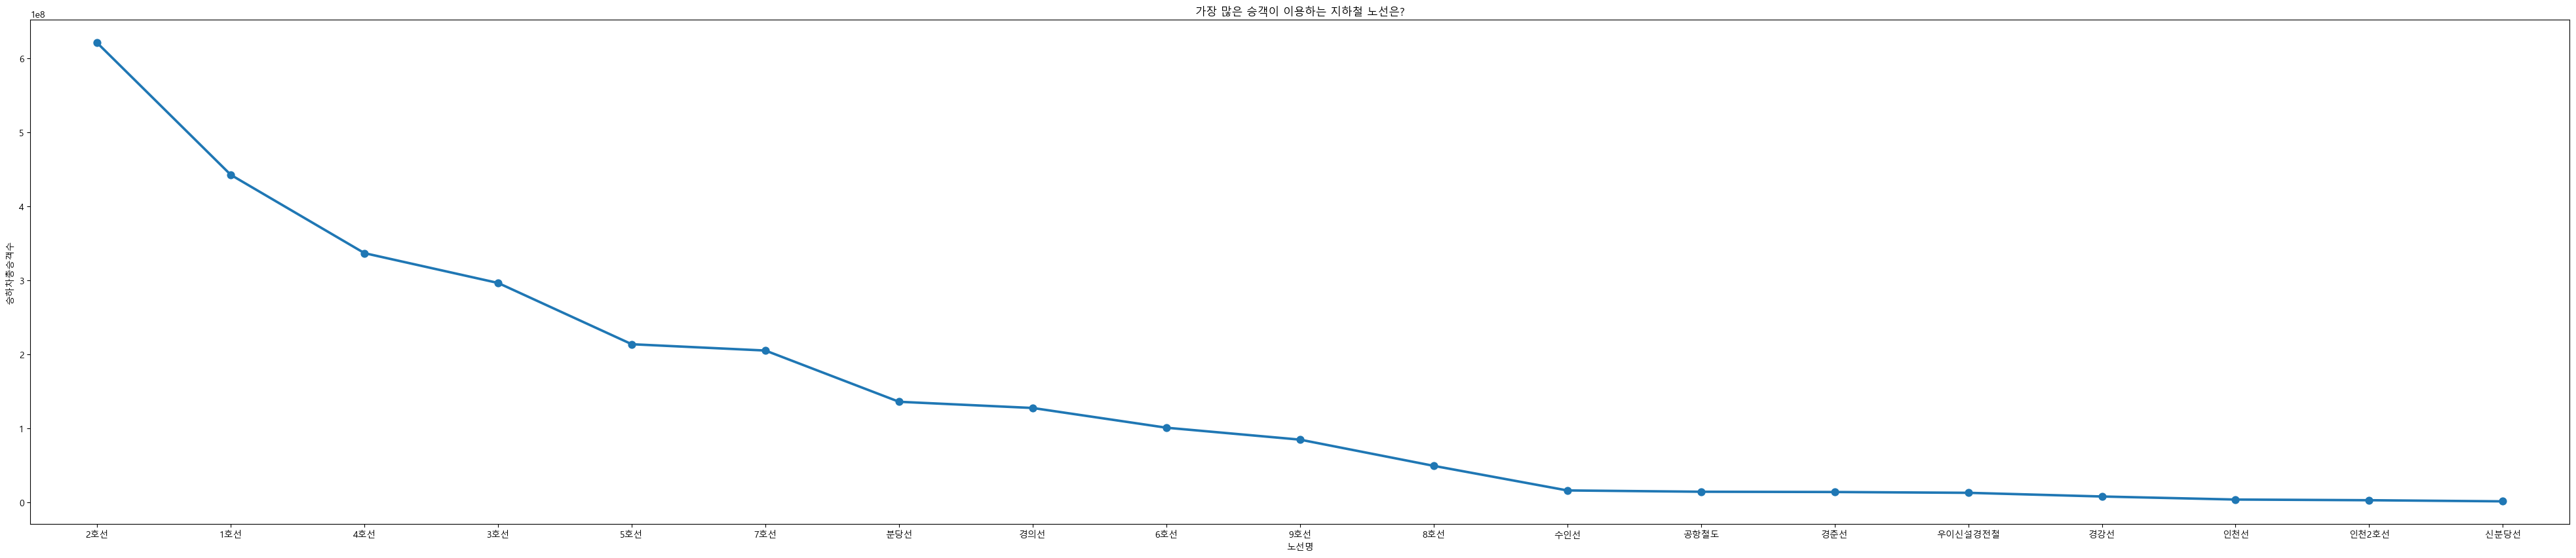

In [175]:
my_sums = raw.groupby('노선명')['승하자총승객수'].sum()
my_sums_1=my_sums.sort_values(ascending=False)
print(my_sums_1)
my_sums_1 = my_sums_1.reset_index()  

plt.figure(figsize=(50,10))
plt.title('가장 많은 승객이 이용하는 지하철 노선은?')
plt.xlabel('노선명')
plt.ylabel('승하차총승객수')
seaborn.pointplot(data=my_sums_1, x='노선명', y='승하자총승객수')
plt.show()

In [176]:
df_2 = raw[['노선명','역명','승차총승객수']]
data_2 = df_2[df_2['노선명']=='2호선']
s = data_2.groupby('역명')['승차총승객수'].sum()

rolling_avg = s.rolling(window=2).mean()
results = []

for i in range(1, len(rolling_avg)):
    prev_station = rolling_avg.index[i-1]
    current_station = rolling_avg.index[i]
    avg_passengers = rolling_avg.iloc[i]   
    results.append((avg_passengers, f"{prev_station}-{current_station} 평균 승차총승객수: {avg_passengers:,.0f}명"))

results.sort(key=lambda x: x[0], reverse=True)
print("--- 2개 역씩 묶은 평균 승객 수 (많은 순) ---")
for result in results:
    print(result[1])


--- 2개 역씩 묶은 평균 승객 수 (많은 순) ---
강남-강변 평균 승차총승객수: 13,207,743명
합정-홍대입구 평균 승차총승객수: 13,095,622명
신도림-신림 평균 승차총승객수: 12,126,128명
사당-삼성 평균 승차총승객수: 11,952,826명
이대-잠실 평균 승차총승객수: 11,110,312명
잠실-잠실나루 평균 승차총승객수: 10,770,870명
교대-구로디지털단지 평균 승차총승객수: 10,288,910명
건대입구-교대 평균 승차총승객수: 10,140,070명
강변-건대입구 평균 승차총승객수: 9,695,558명
봉천-사당 평균 승차총승객수: 8,908,926명
선릉-성수 평균 승차총승객수: 8,364,210명
신대방-신도림 평균 승차총승객수: 8,329,049명
구로디지털단지-구의 평균 승차총승객수: 7,914,213명
서초-선릉 평균 승차총승객수: 7,855,480명
신림-신정네거리 평균 승차총승객수: 7,319,776명
성수-시청 평균 승차총승객수: 7,139,966명
서울대입구-서초 평균 승차총승객수: 6,920,458명
삼성-상왕십리 평균 승차총승객수: 6,614,141명
역삼-영등포구청 평균 승차총승객수: 6,536,396명
낙성대-당산 평균 승차총승객수: 6,453,333명
을지로입구-이대 평균 승차총승객수: 6,329,486명
상왕십리-서울대입구 평균 승차총승객수: 6,164,496명
을지로4가-을지로입구 평균 승차총승객수: 6,054,947명
동대문역사문화공원-뚝섬 평균 승차총승객수: 5,673,224명
까치산-낙성대 평균 승차총승객수: 5,490,344명
한양대-합정 평균 승차총승객수: 5,473,648명
신촌-아현 평균 승차총승객수: 5,380,593명
신정네거리-신촌 평균 승차총승객수: 5,300,762명
구의-까치산 평균 승차총승객수: 4,966,578명
양천구청-역삼 평균 승차총승객수: 4,891,188명
신당-신대방 평균 승차총승객수: 4,800,964명
시청-신답 평균 승차총승객수: 4,712,116명


In [177]:
import folium
import pandas as pd

file_2 = r'.\map\지하철노선위경도정보2.csv'
df = pd.read_csv(file_2)

line2_df = df[(df['호선'] == '2호선') & (df['역지역'] == '수도권')]
two_stations_df = line2_df[line2_df['역이름'].isin(['홍대입구', '합정'])]

map_center_lat = line2_df['위도'].mean()
map_center_lon = line2_df['경도'].mean()
my_map = folium.Map(location=[map_center_lat, map_center_lon], zoom_start=12)

for index, row in line2_df.iterrows():
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=4, # 원의 크기
        color='green', # 2호선 색상
        fill_color='green',
        tooltip=row['역이름']
    ).add_to(my_map)

for index, row in two_stations_df.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        tooltip=row['역이름'],
        popup=f"{row['호선']} {row['역이름']}"
    ).add_to(my_map)

midpoint_lat = two_stations_df['위도'].mean()
midpoint_lon = two_stations_df['경도'].mean()

folium.Marker(
    location=[midpoint_lat, midpoint_lon],
    tooltip='중앙 지점',
    popup='홍대입구와 합정의 중앙',
    icon=folium.Icon(color='red', icon='star')
).add_to(my_map)

my_map

In [178]:
#EDA 4~5주차

--- 요일별 승차총승객수 정규성 검정 결과 ---

▶ 금
  - 검정 통계량: 0.6190
  - P-value: 0.0000
  - 결론: 데이터는 정규 분포를 따르지 않는다. (귀무가설 기각)
---------------------------------------------
▶ 목
  - 검정 통계량: 0.4727
  - P-value: 0.0000
  - 결론: 데이터는 정규 분포를 따르지 않는다. (귀무가설 기각)
---------------------------------------------
▶ 수
  - 검정 통계량: 0.4312
  - P-value: 0.0000
  - 결론: 데이터는 정규 분포를 따르지 않는다. (귀무가설 기각)
---------------------------------------------
▶ 월
  - 검정 통계량: 0.4105
  - P-value: 0.0000
  - 결론: 데이터는 정규 분포를 따르지 않는다. (귀무가설 기각)
---------------------------------------------
▶ 일
  - 검정 통계량: 0.8356
  - P-value: 0.0008
  - 결론: 데이터는 정규 분포를 따르지 않는다. (귀무가설 기각)
---------------------------------------------
▶ 토
  - 검정 통계량: 0.8452
  - P-value: 0.0012
  - 결론: 데이터는 정규 분포를 따르지 않는다. (귀무가설 기각)
---------------------------------------------
▶ 화
  - 검정 통계량: 0.3990
  - P-value: 0.0000
  - 결론: 데이터는 정규 분포를 따르지 않는다. (귀무가설 기각)
---------------------------------------------
  - P-value: 0.0000

kruskal-wallis one-way ANOVA on ranks 검정: 요일 간 승차총승객수

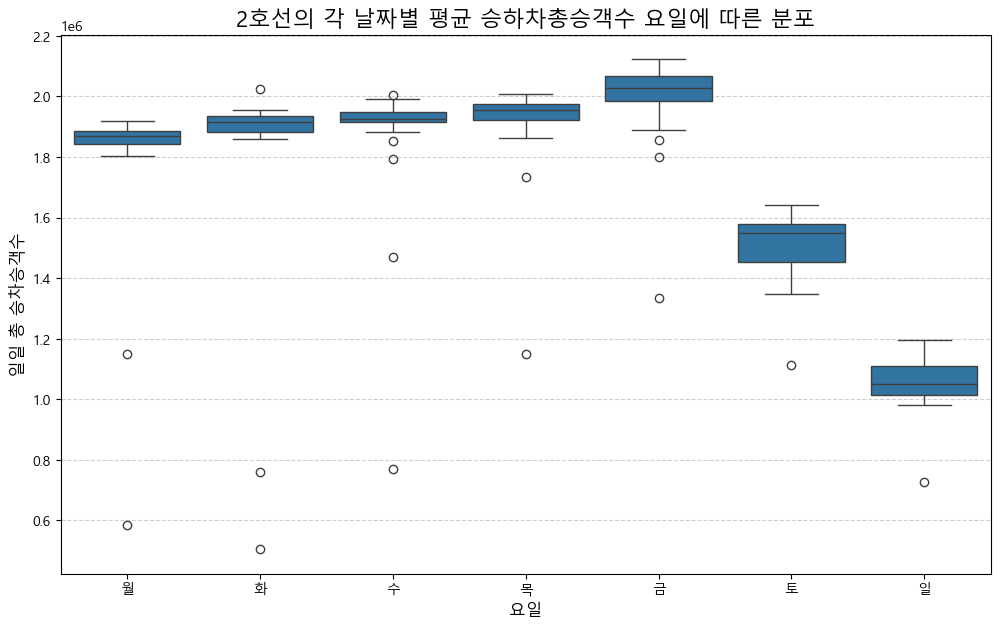

In [179]:
# 1. 비모수 검정 해보기
# 비모수 검정 조건, N<30, 정규성 검정을 만족하지 않음.
# 가설1. 주어진 데이터중 2호선의 각 날짜별 평균 승차총승객수는 요일에 따라 유의한 차이가 있다.
# 데이터 : 각 날짜별로 평균 승하총승객수를 계산하고, 각 요일별로 묶어서 이용

# 데이터 전처리
df_3 = raw[['노선명','역명','승차총승객수','요일','사용일자']]
df_4 = df_3[df_3['노선명']=='2호선']
df_5 = df_4.groupby('사용일자').agg(승차총승객수=('승차총승객수', 'sum'),요일=('요일', 'first'))
grouped_by_day = df_5.groupby('요일')

# N<30 이므로 정규성 검정 진행
from scipy.stats import shapiro
print("--- 요일별 승차총승객수 정규성 검정 결과 ---\n")
for day, group_data in grouped_by_day:
    
    stat, p_value = shapiro(group_data['승차총승객수'])
    
    print(f"▶ {day}")
    print(f"  - 검정 통계량: {stat:.4f}")
    print(f"  - P-value: {p_value:.4f}")
    
    alpha = 0.05
    if p_value > alpha:
        print("  - 결론: 데이터는 정규 분포를 따른다. (귀무가설 채택)")
    else:
        print("  - 결론: 데이터는 정규 분포를 따르지 않는다. (귀무가설 기각)")
    print("-" * 45)

#정규성 검정 결과: 모든 데이터가 정규분포를 따르지 않는다.

# 비모수 검정 시행-#kruskal-wallis one-way ANOVA on ranks 검정
from scipy.stats import kruskal
import scikit_posthocs as sp

data_groups = []
days_order = ['월', '화', '수', '목', '금', '토', '일']
for day in days_order:
    if day in df_5['요일'].unique():
        data_groups.append(df_5[df_5['요일'] == day]['승차총승객수'])

stat, p_value = kruskal(*data_groups)
print(f"  - P-value: {p_value:.4f}\n")

alpha = 0.05
if p_value < alpha:
    print("kruskal-wallis one-way ANOVA on ranks 검정: 요일 간 승차총승객수에는 통계적으로 유의한 차이가 있다.")
else:
    print("kruskal-wallis one-way ANOVA on ranks 검정: 요일 간 승차총승객수에는 통계적으로 유의한 차이가 없다.")

# 사후 분석: 어떤 요일 간에 차이가 나는지 확인
if p_value < alpha:
    print("\n--- 2. 사후 분석 (던 검정) 시작 ---")
    dunn_result = sp.posthoc_dunn(df_5, val_col='승차총승객수', group_col='요일', p_adjust='bonferroni')
    print("각 요일 쌍 간의 P-value (0.05보다 작으면 유의한 차이):")
    print(dunn_result)
    
    significant_results = dunn_result[dunn_result < alpha]
    print("\n--- 유의미한 차이가 있는 요일 쌍 (p < 0.05) ---")
    print(significant_results)

print("일요일과 월~금요일은 유의한 차이가 있다.")
print("토요일과 화~금요일은 유의한 차이가 있다.")
print("월요일과 목~금요일은 유의한 차이가 있다.")
print("화요일과 금요일은 유의한 차이가 있다.")

#결과 시각화
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 7))
days_order = ['월', '화', '수', '목', '금', '토', '일']
seaborn.boxplot(x='요일', y='승차총승객수', data=df_5, order=days_order)
plt.title('2호선의 각 날짜별 평균 승하차총승객수 요일에 따른 분포', fontsize=16)
plt.xlabel('요일', fontsize=12)
plt.ylabel('일일 총 승차승객수', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.6) 
plt.show()


--- 피어슨 상관 분석 결과 ---
  - 피어슨 상관계수(r): 1.0000
  - P-value: 0.0000e+00


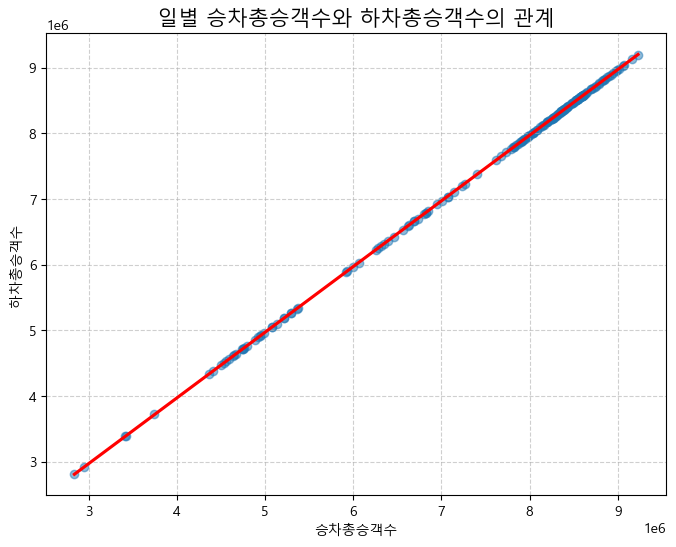

In [180]:
# 상관 분석 해보기
# 가설2. 승차총승객수와 하차총승객수는 양의 상관관계가 있다.

# 1. 데이터 전처리
df_6 = raw[['사용일자','승차총승객수','하차총승객수']]
df_6_daily = df_6.groupby('사용일자')[['승차총승객수', '하차총승객수']].sum()

# 2. 상관 분석 시행- pearson's R
from scipy.stats import pearsonr
corr_coef, p_value = pearsonr(df_6_daily['승차총승객수'], df_6_daily['하차총승객수'])
print("\n--- 피어슨 상관 분석 결과 ---")
print(f"  - 피어슨 상관계수(r): {corr_coef:.4f}")
print(f"  - P-value: {p_value:.4e}")

# 3. 시각화 (산점도 + 회귀선)
plt.figure(figsize=(8, 6))
seaborn.regplot(x='승차총승객수', y='하차총승객수', data=df_6_daily,
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('일별 승차총승객수와 하차총승객수의 관계', fontsize=15)
plt.xlabel('승차총승객수')
plt.ylabel('하차총승객수')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<class 'pandas.core.series.Series'>
DatetimeIndex: 181 entries, 2019-01-01 to 2019-06-30
Series name: 승하자총승객수
Non-Null Count  Dtype  
--------------  -----  
181 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 181 entries, 2019-01-01 to 2019-06-30
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   지점        181 non-null    int64  
 1   지점명       181 non-null    object 
 2   평균기온(°C)  181 non-null    float64
 3   승하자총승객수   181 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.1+ KB

--- 피어슨 상관 분석 결과 ---
  - 피어슨 상관계수(r): 0.1590
  - P-value: 3.2570e-02


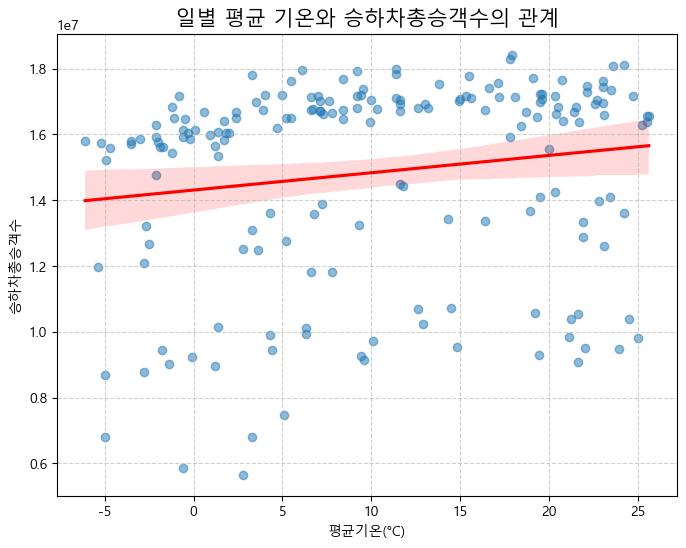

In [184]:
# 외부 데이터를 이용해 분석하기
# 가설3. 일별 평균 기온과 승하차총승객수는 양의 상관 관계가 있다
# 데이터: 기상청 기상자료개방포털 2019.1.1~6.30 서울 일일 기온 평균 데이터 이용

import pandas as pd

# 1. 파일 읽기
temperature_file = '2019_1to6_temp.csv'
df_temperature = pd.read_csv(temperature_file, encoding='cp949')
df_temperature['일시'] = pd.to_datetime(df_temperature['일시'])
df_temperature.set_index('일시', inplace=True)
df_temperature.sample(5)
# 2. 비교 데이터 가지고 오기
date_sums = raw.groupby('사용일자')['승하자총승객수'].sum()
date_sums.info()

# 3. 데이터 병합
merged_df = pd.merge(df_temperature, date_sums, left_index=True, right_index=True)
merged_df.rename(columns={'기온(°C)': '평균 기온'}, inplace=True)
merged_df.info()

# 4. 상관 분석 시행- pearson's R
from scipy.stats import pearsonr
corr_coef, p_value = pearsonr(merged_df['평균기온(°C)'], merged_df['승하자총승객수'])
print("\n--- 피어슨 상관 분석 결과 ---")
print(f"  - 피어슨 상관계수(r): {corr_coef:.4f}")
print(f"  - P-value: {p_value:.4e}") 

# 3. 시각화 (산점도 + 회귀선)
plt.figure(figsize=(8, 6))
seaborn.regplot(x='평균기온(°C)', y='승하자총승객수', data=merged_df,
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('일별 평균 기온와 승하차총승객수의 관계', fontsize=15)
plt.xlabel('평균기온(°C)')
plt.ylabel('승하차총승객수')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
!pip install openpyxl

In [ ]:
# 재밌는 아이디어 도출해보기
raw_pos= raw[['사용일자', '요일', '노선명', '역명', '승차총승객수', '하차총승객수', '승하자총승객수']]
raw_pos.head()

In [ ]:
_1='BUS_STATION_BOARDING_MONTH_201901_to_201906/BUS_STATION_BOARDING_MONTH_201901.csv'
data_10=pd.read_csv(file_1, encoding='cp949')file
data_10.info()
data_10.head()

In [ ]:
import pandas as pd
file_2='BUS_STATION_BOARDING_MONTH_201901_to_201906/서울시 버스정류소 좌표 데이터(2019.07.10).xlsx'
data_11=pd.read_excel(file_2)
data_11.info()
data_11.head()

In [ ]:
import os
dirpath = './BUS_STATION_BOARDING_MONTH_201901_to_201906/'
files_3 = os.listdir(dirpath)
data_12 = pd.DataFrame()

for file in files_3:
    filepath = os.path.join(dirpath, file)
    
    # 폴더는 건너뛰기 (.ipynb_checkpoints 포함)
    if os.path.isdir(filepath):
        continue
    
    # CSV 파일만 처리
    if file.endswith('.csv'):
        try:
            temp = pd.read_csv(filepath,encoding='cp949')
            data_12 = pd.concat([data_12, temp], axis=0)
        except Exception as e:
            print(f"읽기 실패: {filepath} / 오류: {e}")

data_13= data_12.reset_index(drop=True)  
data_13.tail()

In [ ]:
#학기 중일 때와 방학 중일 때 홍제역 승하차총승객수는 유의한 차이가 있다. 
data_Hongje = raw[raw['역명'] == '홍제']
no_school_Hongje=data_Hongje[(data_Hongje['사용일자'] >= '2019-01-01') & (data_Hongje['사용일자'] <= '2019-02-28')]
yes_school_Hongje=data_Hongje[(data_Hongje['사용일자'] >= '2019-03-01') & (data_Hongje['사용일자'] <= '2019-06-30')]

no_school_Hongje=no_school_Hongje.groupby('사용일자')['승하자총승객수'].mean()
yes_school_Hongje=yes_school_Hongje.groupby('사용일자')['승하자총승객수'].mean()

t_statistic, p_value = stats.ttest_ind(no_school_Hongje, yes_school_Hongje, equal_var=False)

print("=== T-검정 결과 ===")
print(f"T-통계량 (T-statistic): {t_statistic:.4f}")
print(f"P-value (유의확률): {p_value:.15f}")
print("--------------------")

if p_value < 0.05: 
    print(f"{p_value}가 유의수준 5%(0.05)미만이므로 귀무가설 기각: 상명대학교가 학기 중일 때와 방학 중일 때 홍제역 승하차총승객수는 유의한 차이가 있다.")
else:
    print(f"{p_value}가 유의수준 5%(0.05)이이므로 귀무가설 채택: 상명대학교가 학기 중일 때와 방학 중일 때 홍제역 승하차총승객수는 유의한 차이가 .")


no_school_total_Hongje=no_school_Hongje.mean()
print(f"상명대학교가 방학일 때 홍제역의 승하차총승객수 평균: {int(no_school_total_Hongje)}명/일")
yes_school_total_Hongje=yes_school_Hongje.mean()
print(f"상명대학교가 학기 중일 때 홍제역의 승하차총승객수: {int(yes_school_total_Hongje)}명/일")
print((yes_school_total_Hongje-no_school_total_Hongje))
print((yes_school_total_Hongje-no_school_total_Hongje)/(8231*2))
print((yes_school_total_Hongje-no_school_total_Hongje)/((yes_school_total_Hongje+no_school_total_Hongje)/2))

In [ ]:
#가설4: 상명대학교가 학기 중일 때와 방학 중일 때 경복궁역 승하차총승객수는 유의한 차이가 있다. 
data_Gyeongbokgung = raw[raw['역명'] == '경복궁']
no_school_Gyeongbokgung=data_Gyeongbokgung[(data_Gyeongbokgung['사용일자'] >= '2019-01-01') & (data_Gyeongbokgung['사용일자'] <= '2019-02-28')]
yes_school_Gyeongbokgung=data_Gyeongbokgung[(data_Gyeongbokgung['사용일자'] >= '2019-03-01') & (data_Gyeongbokgung['사용일자'] <= '2019-06-30')]

no_school_Gyeongbokgung=no_school_Gyeongbokgung.groupby('사용일자')['승하자총승객수'].mean()
yes_school_Gyeongbokgung=yes_school_Gyeongbokgung.groupby('사용일자')['승하자총승객수'].mean()

t_statistic, p_value = stats.ttest_ind(no_school_Gyeongbokgung, yes_school_Gyeongbokgung, equal_var=False)

print("=== T-검정 결과 ===")
print(f"T-통계량 (T-statistic): {t_statistic:.4f}")
print(f"P-value (유의확률): {p_value:.10f}")
print("--------------------")

if p_value < 0.05: 
    print(f"{p_value}가 유의수준 5%(0.05)미만이므로 귀무가설 기각: 상명대학교가 학기 중일 때와 방학 중일 때 경복궁역 승하차총승객수는 유의한 차이가 있다.")
else:
    print(f"{p_value}가 유의수준 5%(0.05)이상이므로 귀무가설 채택: 상명대학교가 학기 중일 때와 방학 중일 때 경복궁역 승하차총승객수는 유의한 차이가 .")


no_school_total_Gyeongbokgung=no_school_Gyeongbokgung.mean()
print(f"상명대학교가 방학일 때 경복궁역의 승하차총승객수 평균: {int(no_school_total_Gyeongbokgung)}명/일")
yes_school_total_Gyeongbokgung=yes_school_Gyeongbokgung.mean()
print(f"상명대학교가 학기 중일 때 경복궁역의 승하차총승객수 평균: {int(yes_school_total_Gyeongbokgung)}명/일")
print((yes_school_total_Gyeongbokgung-no_school_total_Gyeongbokgung))
print((yes_school_total_Gyeongbokgung-no_school_total_Gyeongbokgung)/(8231*2))
print((yes_school_total_Gyeongbokgung-no_school_total_Gyeongbokgung)/((yes_school_total_Gyeongbokgung+no_school_total_Gyeongbokgung)/2))

In [ ]:
#학기 중일 때와 방학 중일 때 광화문역 승하차총승객수는 유의한 차이가 있다. 
data_Hongje = raw[raw['역명'] == '광화문']
no_school_Hongje=data_Hongje[(data_Hongje['사용일자'] >= '2019-01-01') & (data_Hongje['사용일자'] <= '2019-02-28')]
yes_school_Hongje=data_Hongje[(data_Hongje['사용일자'] >= '2019-03-01') & (data_Hongje['사용일자'] <= '2019-06-30')]

no_school_Hongje=no_school_Hongje.groupby('사용일자')['승하자총승객수'].mean()
yes_school_Hongje=yes_school_Hongje.groupby('사용일자')['승하자총승객수'].mean()

t_statistic, p_value = stats.ttest_ind(no_school_Hongje, yes_school_Hongje, equal_var=False)

print("=== T-검정 결과 ===")
print(f"T-통계량 (T-statistic): {t_statistic:.4f}")
print(f"P-value (유의확률): {p_value:.15f}")
print("--------------------")

if p_value < 0.05: 
    print(f"{p_value}가 유의수준 5%(0.05)미만이므로 귀무가설 기각: 상명대학교가 학기 중일 때와 방학 중일 때 홍제역 승하차총승객수는 유의한 차이가 있다.")
else:
    print(f"{p_value}가 유의수준 5%(0.05)이이므로 귀무가설 채택: 상명대학교가 학기 중일 때와 방학 중일 때 홍제역 승하차총승객수는 유의한 차이가 .")


no_school_total_Hongje=no_school_Hongje.mean()
print(f"상명대학교가 방학일 때 광화문역의 승하차총승객수 평균: {int(no_school_total_Hongje)}명/일")
yes_school_total_Hongje=yes_school_Hongje.mean()
print(f"상명대학교가 학기 중일 때 광화문역의 승하차총승객수: {int(yes_school_total_Hongje)}명/일")
print((yes_school_total_Hongje-no_school_total_Hongje))
print((yes_school_total_Hongje-no_school_total_Hongje)/((yes_school_total_Hongje+no_school_total_Hongje)/2))

In [ ]:
#학기 중일 때와 방학 중일 때 광화문역 승하차총승객수는 유의한 차이가 있다. 
data_Hongje = raw[raw['역명'] == '숭실대입구']
no_school_Hongje=data_Hongje[(data_Hongje['사용일자'] >= '2019-01-01') & (data_Hongje['사용일자'] <= '2019-02-28')]
yes_school_Hongje=data_Hongje[(data_Hongje['사용일자'] >= '2019-03-01') & (data_Hongje['사용일자'] <= '2019-06-30')]

no_school_Hongje=no_school_Hongje.groupby('사용일자')['승하자총승객수'].mean()
yes_school_Hongje=yes_school_Hongje.groupby('사용일자')['승하자총승객수'].mean()

t_statistic, p_value = stats.ttest_ind(no_school_Hongje, yes_school_Hongje, equal_var=False)

print("=== T-검정 결과 ===")
print(f"T-통계량 (T-statistic): {t_statistic:.4f}")
print(f"P-value (유의확률): {p_value:.15f}")
print("--------------------")

if p_value < 0.05: 
    print(f"{p_value}가 유의수준 5%(0.05)미만이므로 귀무가설 기각: 상명대학교가 학기 중일 때와 방학 중일 때 홍제역 승하차총승객수는 유의한 차이가 있다.")
else:
    print(f"{p_value}가 유의수준 5%(0.05)이이므로 귀무가설 채택: 상명대학교가 학기 중일 때와 방학 중일 때 홍제역 승하차총승객수는 유의한 차이가 .")


no_school_total_Hongje=no_school_Hongje.mean()
print(f"상명대학교가 방학일 때 한양대역의 승하차총승객수 평균: {int(no_school_total_Hongje)}명/일")
yes_school_total_Hongje=yes_school_Hongje.mean()
print(f"상명대학교가 학기 중일 때 한양대역의 승하차총승객수: {int(yes_school_total_Hongje)}명/일")
print((yes_school_total_Hongje-no_school_total_Hongje))
print((yes_school_total_Hongje-no_school_total_Hongje)/((yes_school_total_Hongje+no_school_total_Hongje)/2))